In [12]:
import time
import re
import pylab as pl
import numpy as np
import pylab as pl

from datetime import datetime, timedelta

import subprocess

import os
import pandas as pd

import concurrent.futures


from joblib import Parallel, delayed
import shutil


from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor

In [ ]:

os.system('gcloud compute instances delete --zone=europe-west3-c --quiet $(gcloud compute instances list --format="value(name)")')
os.system('gcloud compute instances delete --zone=asia-south1-c --quiet $(gcloud compute instances list --format="value(name)")')
os.system('gcloud compute instances delete --zone=us-west1-b --quiet $(gcloud compute instances list --format="value(name)")')   


In [ ]:

def str2datetime(s):
    parts = s.split('.')
    dt = datetime.strptime(parts[0], "%Y-%m-%d %H:%M:%S")
    return dt.replace(microsecond=int(parts[1]))


def remove_outliers(x, outlierConstant = 1.5):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    resultList = []
    removedList = []
    for y in a.tolist():
        if y >= quartileSet[0] and y <= quartileSet[1]:
            resultList.append(y)
        else:
            removedList.append(y)
    return (resultList, removedList)
def getThroughput(experiment):

    result = subprocess.check_output('cat ../'+experiment+'/nohup_client_*', shell=True)


    result = result.decode("utf-8") 

    lines = result.split('\n')

    commit_pat = re.compile('([^[].*) \[hotstuff info\] ([0-9.]*)$')
#     commit_pat = re.compile('([^[].*) \[hotstuff info\] got*')

    Times = []
    lats = []

    for line in lines:
        m = commit_pat.match(line)
        if m:
            try:

                time_item = float((line.split(' ')[1]).split(':')[0])*3600 + float((line.split(' ')[1]).split(':')[1])*60 + \
                float((line.split(' ')[1]).split(':')[2])
                Times.append(time_item)        

                lats.append(float(m.group(2)))
            except:
                continue


    begin_time = None
    values = []
    interval = 1
    cnt = 0
    Times.sort()
    for timestamp in Times:
        if begin_time is None:
            begin_time = timestamp
            next_begin_time = timestamp +interval

        while timestamp >= next_begin_time:
            begin_time = next_begin_time
            next_begin_time += interval
            values.append(cnt)
            cnt = 0
        cnt += 1
    values.append(cnt)

#     lats, _ = remove_outliers(lats)
#     print(len(values))


    return np.arange(len(values))*interval,np.array(values)/interval, lats

In [4]:
# p = subprocess.Popen(['../../hotstuff-keygen', ' --num', '--n', str(4)],
#                      stdout=subprocess.PIPE, stderr=open(os.devnull, 'w'))

In [5]:
# print([[t[4:] for t in l.decode('ascii').split()] for l in p.stdout])
# # [[t for t in l.decode('ascii').split()] for l in p.stdout.read()]

In [6]:
# os.system('echo 3108 | sudo -S sh job_mini.sh '+ 'test')


In [7]:
# regions= ['us-west-1', 'ap-south-1']
# regions= ['ap-south-1', 'eu-central-1', 'us-west-2']
# regions= ['ap-south-1', 'eu-central-1']
regions= ['ap-south-1']


instance_type = 't2.small'

In [8]:

config_list = [\
#                'global_3cls',\
#                'global_4cls',\
#                'global_6cls',\
#                'global_8cls',\
#                'global_2cls',\
#                'local_3cls',\
#                'local_4cls',\
#                'local_6cls',\
#                'local_8cls',\
               'local_2cls'\
               ]




Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-23].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-19].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-14].


NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-23  us-west1-b  e2-highmem-2               10.138.0.2   34.83.154.187  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-19  us-west1-b  e2-highmem-2               10.138.0.3   35.197.56.191  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-14  us-west1-b  e2-highmem-2               10.138.0.5   35.230.85.180  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-08].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-31].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-42].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-08  us-west1-b  e2-highmem-2               10.138.0.7   34.168.165.44  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-31  us-west1-b  e2-highmem-2               10.138.0.27  34.168.170.225  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP  STATUS
resdb-42  us-west1-b  e2-highmem-2               10.138.0.24  35.230.54.4  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-29].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-06].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-10].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-47].


NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-29  us-west1-b  e2-highmem-2               10.138.0.26  34.82.173.38  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-17].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-34].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-00].


NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-06  us-west1-b  e2-highmem-2               10.138.0.59  34.168.27.223  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-10  us-west1-b  e2-highmem-2               10.138.0.45  34.82.163.140  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-47  us-west1-b  e2-highmem-2               10.138.0.47  34.82.15.249  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-30].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-18].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images

NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-34  us-west1-b  e2-highmem-2               10.138.0.19  35.230.51.47  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-00  us-west1-b  e2-highmem-2               10.138.0.40  34.168.51.162  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-17  us-west1-b  e2-highmem-2               10.138.0.52  35.230.70.225  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-13].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-45].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-28].


NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP      STATUS
resdb-30  us-west1-b  e2-highmem-2               10.138.0.16  104.199.123.146  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-18  us-west1-b  e2-highmem-2               10.138.0.71  35.197.82.32  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-12].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-38].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-15].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-13  us-west1-b  e2-highmem-2               10.138.0.63  34.82.155.66  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-45  us-west1-b  e2-highmem-2               10.138.0.28  35.199.175.47  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP  STATUS
resdb-28  us-west1-b  e2-highmem-2               10.138.0.36  34.168.86.3  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-24].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-07].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-32].


NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP   EXTERNAL_IP    STATUS
resdb-12  us-west1-b  e2-highmem-2               10.138.0.107  34.127.41.116  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP   EXTERNAL_IP   STATUS
resdb-38  us-west1-b  e2-highmem-2               10.138.0.111  34.105.60.25  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP   EXTERNAL_IP     STATUS
resdb-15  us-west1-b  e2-highmem-2               10.138.0.119  35.230.102.185  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-35].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-05].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-24  us-west1-b  e2-highmem-2               10.138.0.17  34.127.7.165  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-32  us-west1-b  e2-highmem-2               10.138.0.87  34.82.250.143  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-07  us-west1-b  e2-highmem-2               10.138.0.39  35.227.178.36  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-44].


NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-05  us-west1-b  e2-highmem-2               10.138.0.76  35.247.24.174  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-35  us-west1-b  e2-highmem-2               10.138.0.9   34.82.219.56  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-41].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-33].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-39].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-37].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-26].


NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-44  us-west1-b  e2-highmem-2               10.138.0.37  35.230.14.11  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-41  us-west1-b  e2-highmem-2               10.138.0.11  34.168.180.120  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-02].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-09].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images

NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP    EXTERNAL_IP  STATUS
resdb-39  us-west1-b  e2-highmem-2               10.138.15.215  34.82.18.56  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-37  us-west1-b  e2-highmem-2               10.138.0.91  35.203.162.136  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-33  us-west1-b  e2-highmem-2               10.138.0.8   35.233.152.253  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-02  us-west1-b  e2-highmem-2               10.138.0.48  35.197.124.123  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP      STATUS
resdb-26  us-west1-b  e2-highmem-2               10.138.0.66  104.199.120.208  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP    EXTERNAL_IP   STATUS
resdb-09  us-west1-b  e2-highmem-2               10.138.15.2

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP    EXTERNAL_IP   STATUS
resdb-40  us-west1-b  e2-highmem-2               10.138.15.211  34.83.37.177  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP   EXTERNAL_IP  STATUS
resdb-04  us-west1-b  e2-highmem-2               10.138.0.121  34.83.2.201  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-49  us-west1-b  e2-highmem-2               10.138.0.83  34.168.104.157  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
resdb-01  us-west1-b  e2-highmem-2               10.138.0.70  34.82.74.108  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-21  us-west1-b  e2-highmem-2               10.138.0.23  34.105.90.229  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-48].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-43].
Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-16].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1

NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-48  us-west1-b  e2-highmem-2               10.138.0.21  35.197.64.167  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-43  us-west1-b  e2-highmem-2               10.138.0.43  35.199.169.44  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP    EXTERNAL_IP     STATUS
resdb-16  us-west1-b  e2-highmem-2               10.138.15.214  35.203.174.202  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-36  us-west1-b  e2-highmem-2               10.138.0.35  34.168.244.192  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP    EXTERNAL_IP     STATUS
resdb-27  us-west1-b  e2-highmem-2               10.138.15.213  34.168.106.133  RUNNING
NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
resdb-22  us-west1-b  e2-highmem-2               10.138.0.12  35.233.196.218  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-20].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-20  us-west1-b  e2-highmem-2               10.138.0.64  35.233.207.10  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-03].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-03  us-west1-b  e2-highmem-2               10.138.0.62  104.198.102.7  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-46].
 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/instances/resdb-11].


NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP   EXTERNAL_IP    STATUS
resdb-46  us-west1-b  e2-highmem-2               10.138.0.122  35.233.129.21  RUNNING


 - The resource 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831' is deprecated. A suggested replacement is 'projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20240110'.



NAME      ZONE        MACHINE_TYPE  PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP    STATUS
resdb-11  us-west1-b  e2-highmem-2               10.138.0.38  34.82.146.161  RUNNING
10.138.0.40
10.138.0.70
10.138.0.48
10.138.0.62
10.138.0.121
10.138.0.76
10.138.0.59
10.138.0.39
10.138.0.7
10.138.15.210
10.138.0.45
10.138.0.38
10.138.0.107
10.138.0.63
10.138.0.5
10.138.0.119
10.138.15.214
10.138.0.52
10.138.0.71
10.138.0.3
10.138.0.64
10.138.0.23
10.138.0.12
10.138.0.2
10.138.0.17
10.138.15.212
10.138.0.66
10.138.15.213
10.138.0.36
10.138.0.26
10.138.0.16
10.138.0.27
10.138.0.87
10.138.0.8
10.138.0.19
10.138.0.9
10.138.0.35
10.138.0.91
10.138.0.111
10.138.15.215
10.138.15.211
10.138.0.11
10.138.0.24
10.138.0.43
10.138.0.37
10.138.0.28
10.138.0.122
10.138.0.47
10.138.0.21
10.138.0.83
 
10.138.0.40    10.138.0.40
10.138.0.70    10.138.0.70
10.138.0.48    10.138.0.48
10.138.0.62    10.138.0.62
10.138.0.121    10.138.0.121
10.138.0.76    10.138.0.76
10.138.0.59    10.138.0.59
10.138.0.39    10.138.0.39


[sudo] password for tejas: CMake Warning:
  No source or binary directory provided.  Both will be assumed to be the
  same as the current working directory, but note that this warning will
  become a fatal error in future CMake releases.




-- Found OpenSSL: /usr/lib/x86_64-linux-gnu/libcrypto.so (found suitable version "3.0.2", minimum required is "1.1.0")  
-- Found OpenSSL: /usr/lib/x86_64-linux-gnu/libcrypto.so (found version "3.0.2")  
-- Could NOT find Doxygen (missing: DOXYGEN_EXECUTABLE) 
-- Configuring done
-- Generating done
-- Build files have been written to: /home/tejas/work/hotstuffO
[ 21%] Built target libsecp256k1
Consolidate compiler generated dependencies of target hotstuff
Consolidate compiler generated dependencies of target salticidae
[ 45%] Built target salticidae
[ 62%] Built target hotstuff
[ 64%] Built target salticidae_static
[ 67%] Built target salticidae_shared
[ 70%] Built target hotstuff_shared
[ 72%] Built target hotstuff_static
Consolidate compiler generated dependencies of target hotstuff-keygen
Consolidate compiler generated dependencies of target test_secp256k1
Consolidate compiler generated dependencies of target hotstuff-tls-keygen
Consolidate compiler generated dependencies of target 

In file included from /home/tejas/work/hotstuffO/examples/hotstuff_client.cpp:26:
/home/tejas/work/hotstuffO/include/hotstuff/database.h:19:10: fatal error: HashMap.h: No such file or directory
   19 | #include "HashMap.h"
      |          ^~~~~~~~~~~
compilation terminated.
make[2]: *** [examples/CMakeFiles/hotstuff-client.dir/build.make:76: examples/CMakeFiles/hotstuff-client.dir/hotstuff_client.cpp.o] Error 1
make[1]: *** [CMakeFiles/Makefile2:452: examples/CMakeFiles/hotstuff-client.dir/all] Error 2
make: *** [Makefile:136: all] Error 2


48 ../../hotstuff-keygen [['03ac2adf2cb43e7ffd72e193199bb72e02bad4f9a44ebe3d9a7cc5e4788d502618', '4dfc0e71a9737d099f9bfc17159bc12f43b6a3ed322bd5a3cbf91a98ca348e7c'], ['029831c47b43855bf7be2943da1a1af35d8698f35ae1400b62cf9804e71b81702d', '8891ef11165930d92c9bd4bab9c64cb850c99bd2dfbb14da04a18e6b8a84fa24'], ['03433dc64d20b05206f6679fc2fead3d70dba619b7868d262210641fb382494020', '46afcb221fb9684367c186b97ef63ca4bb1fb036cece8c413a92e90e38a19e19'], ['039ba5138fc283a549f2690378e7f7da7ac0e1a89dd02be5d1d3bada9021c76dcd', '9e358ceef7b87ed36f74bb1f5938b1ec012308cd174b5d2268d1b2d43716f5be'], ['02b7dc2b0fd0a0cab9f8b6163b93892dc7c09927274e9ed912c0e12b08b7ae3bae', '47ac769f47378ddd5ba852eb11cc8562668231f66b71c6ca5f1dcd44a0216c77'], ['02503bad7f80ef96e0644dec9a30fb0e809376eae783f3877ee775231eee71cb67', 'cd76ec091e395783bd780dbdf6bf3856338ff92671163d43ba3a637c077ea149'], ['0219baf24c61df6874db62cb1d53ca6fca7beeb70b4a0810d2835dff491f2c22f3', '2fb6bd1f788262351d7715acd71452a1276080641c72b110cbf2d1fc5509cf

To github.com:tmane002/hotstuffO.git
   a1f2b37..5dde7e3  main -> main




Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]


Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]




Use with caution in scripts.






















apt does not have a stable CLI interface. Use with caution in scripts.



Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe Translation-en [5124 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/u

Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 c-n-f Metadata [265 kB]
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [144 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse Translation-en [104 kB]
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 c-n-f Metadata [9136 B]
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3059 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-update

Get:18 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe Translation-en [278 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:19 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 c-n-f Metadata [25.7 kB]
Get:20 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 Packages [26.1 kB]
Get:21 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/multiverse Translation-en [7768 B]
Get:22 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 c-n-f Metadata [620 B]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe Translation-en [5124 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
G

Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe Translation-en [5124 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [144 kB]
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse Translation-en [104 kB]
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 c-n-f Metadata [9136 B]
Get:31 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2678 kB]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted Translation-en [365 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe Translation-en [5124 kB]
Get:16 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 c-n-f Metadata [552 B]
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1158 kB]
Get:6 http://us-west1.gce.archive.ubuntu.c

Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [144 kB]
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse Translation-en [104 kB]
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 c-n-f Metadata [265 kB]
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [144 kB]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main Translation-en [493 kB]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 c-n-f Metadata [17.2 kB]
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [144 kB]
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 c-n-f Metadata [9136 B]
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3059 kB]
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse Translation-en [104 kB]
Get:10 http://us-west1.gce.archive.ubuntu.

Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3059 kB]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 c-n-f Metadata [17.2 kB]
Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 Packages [45.7 kB]
Get:24 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/main Translation-en [16.3 kB]
Get:16 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 c-n-f Metadata [552 B]
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1158 kB]
Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 Packages [45.7 kB]
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 c-n-f Metadata [265 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [2619 kB]
Get:25 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 c-n-f Metadata 

Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 c-n-f Metadata [265 kB]
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [144 kB]
Get:39 http://security.ubuntu.com/ubuntu focal-security/universe amd64 c-n-f Metadata [19.2 kB]
Get:40 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [23.9 kB]
Get:41 http://security.ubuntu.com/ubuntu focal-security/multiverse Translation-en [5796 B]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe Translation-en [5124 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe Translation-en [5124 kB]
Get:42 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 c-n-f Metadata [548 B]
Get:19 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 c-n-f Metadata [25.7 kB]
Get:20 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 Packages [26.1 kB]
Get:21 http://us-west1.gce.archive.ubuntu

Get:31 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2678 kB]
Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 Packages [45.7 kB]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 c-n-f Metadata [17.2 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [2619 kB]
Get:24 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/main Translation-en [16.3 kB]
Get:25 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 c-n-f Metadata [1420 B]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted Translation-en [365 kB]
Get:18 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe Translation-en [278 kB]
Get:26 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/restricted amd64 c-n-f Metadata [116 B]
Get:27 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/universe amd64 Packages [2

Get:34 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [2508 kB]
Get:36 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 c-n-f Metadata [552 B]
Get:35 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [349 kB]
Get:32 http://security.ubuntu.com/ubuntu focal-security/main Translation-en [410 kB]
Get:37 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [933 kB]
Get:36 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 c-n-f Metadata [552 B]
Get:37 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [933 kB]
Get:33 http://security.ubuntu.com/ubuntu focal-security/main amd64 c-n-f Metadata [13.2 kB]
Get:34 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [2508 kB]
Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 Packages [45.7 kB]
Get:24 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/main Trans

Get:38 http://security.ubuntu.com/ubuntu focal-security/universe Translation-en [197 kB]
Get:32 http://security.ubuntu.com/ubuntu focal-security/main Translation-en [410 kB]
Get:31 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2678 kB]
Get:39 http://security.ubuntu.com/ubuntu focal-security/universe amd64 c-n-f Metadata [19.2 kB]
Get:40 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [23.9 kB]
Get:32 http://security.ubuntu.com/ubuntu focal-security/main Translation-en [410 kB]
Get:35 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [349 kB]
Get:33 http://security.ubuntu.com/ubuntu focal-security/main amd64 c-n-f Metadata [13.2 kB]
Get:41 http://security.ubuntu.com/ubuntu focal-security/multiverse Translation-en [5796 B]
Get:34 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [2508 kB]
Get:36 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 c-n-f Metadata [552 B]
Get:3

Get:42 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 c-n-f Metadata [548 B]
Get:42 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 c-n-f Metadata [548 B]
Get:41 http://security.ubuntu.com/ubuntu focal-security/multiverse Translation-en [5796 B]
Get:35 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [349 kB]
Get:36 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 c-n-f Metadata [552 B]
Get:37 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [933 kB]
Get:38 http://security.ubuntu.com/ubuntu focal-security/universe Translation-en [197 kB]
Get:39 http://security.ubuntu.com/ubuntu focal-security/universe amd64 c-n-f Metadata [19.2 kB]
Get:40 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [23.9 kB]
Get:33 http://security.ubuntu.com/ubuntu focal-security/main amd64 c-n-f Metadata [13.2 kB]
Get:42 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64


Reading state information...
Fetched 29.9 MB in 6s (5164 kB/s)
Reading package lists...The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu cpp cpp-9 dpkg-dev
  fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bin libc6 libc6-dev libcc1-0 libcrypt-dev libctf-nobfd0
  libctf0 libdpkg-perl libfakeroot libfile-fcntllock-perl libgcc-9-dev
  libgomp1 libisl22 libitm1 liblsan0 libmpc3 libquadmath0 lib

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




Fetched 48.2 MB in 1s (50.5 MB/s)

Reading state information...
90 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...(Reading database ... 60%
Fetched 29.9 MB in 6s (4752 kB/s)ng database ... 65%
Fetched 29.9 MB in 6s (4813 kB/s)database ... 70%
Reading package lists...(Reading database ... 75%
Fetched 29.9 MB in 6s (4836 kB/s)
Building dependency tree...Fetched 29.9 MB in 6s (4908 kB/s)
Reading package lists...Fetched 29.9 MB in 6s (4988 kB/s)
Reading package lists...Fetched 29.9 MB in 6s (4929 kB/s)
(Reading database ... 95%Reading database ... 85%
Reading state information...
(Reading database ... 62221 files and directories currently installed.)
Preparing to unpack .../libc6_2.31-0ubuntu9.14_amd64.deb ...

Reading state information...
Fetched 29.9 MB in 6s (4819 kB/s)
Reading package lists...90 packages can be upgraded. Run 'apt list --upgradable' to see them.
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not 

The following NEW packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu build-essential cpp cpp-9
  dpkg-dev fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bin libc6-dev libcc1-0 libcrypt-dev libctf-nobfd0
  libctf0 libdpkg-perl libfakeroot libfile-fcntllock-perl libgcc-9-dev
  libgomp1 libisl22 libitm1 liblsan0 libmpc3 libquadmath0 libstdc++-9-dev
  libtsan0 libubsan1 linux-libc-dev make manpages-dev
The following packages will be upgraded:
  libc6
1 upgraded, 41 newly installed, 0 to remove and 89 not upgraded.

Reading state information...
Fetched 29.9 MB in 6s (4887 kB/s)
Reading package lists...Need to get 48.2 MB of archives.
After this operation, 203 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6 amd64 2.31-0ubuntu9.14 [2725 kB]

Reading state information...
90 packa

Building dependency tree...Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libcrypt-dev amd64 1:4.4.10-10ubuntu4 [104 kB]
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6-dev amd64 2.31-0ubuntu9.14 [2519 kB]

Building dependency tree...Setting up libc6:amd64 (2.31-0ubuntu9.14) ...

The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu cpp cpp-9 dpkg-dev
  fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl lib

Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils amd64 2.34-6ubuntu1.8 [3384 B]
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc-dev-bin amd64 2.31-0ubuntu9.14 [71.8 kB]
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 linux-libc-dev amd64 5.4.0-170.188 [1125 kB]

Reading state information...
Reading package lists...Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libcrypt-dev amd64 1:4.4.10-10ubuntu4 [104 kB]
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6-dev amd64 2.31-0ubuntu9.14 [2519 kB]
90 packages can be upgraded. Run 'apt list --upgradable' to see them.

Building dependency tree...The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-pro

Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcc1-0 amd64 10.5.0-1ubuntu1~20.04 [48.8 kB]
Get:18 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libgomp1 amd64 10.5.0-1ubuntu1~20.04 [102 kB]
Get:19 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libitm1 amd64 10.5.0-1ubuntu1~20.04 [26.2 kB]
Get:20 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libatomic1 amd64 10.5.0-1ubuntu1~20.04 [9284 B]
Get:21 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libasan5 amd64 9.4.0-1ubuntu1~20.04.2 [2752 kB]
Get:24 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libubsan1 amd64 10.5.0-1ubuntu1~20.04 [785 kB]
Get:25 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libquadmath0 amd64 10.5.0-1ubuntu1~20.04 [146 kB]
Get:26 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libgcc-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [2


Reading state information...
Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libctf-nobfd0 amd64 2.34-6ubuntu1.8 [48.1 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libctf0 amd64 2.34-6ubuntu1.8 [46.7 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-x86-64-linux-gnu amd64 2.34-6ubuntu1.8 [1614 kB]

Reading state information...
90 packages can be upgraded. Run 'apt list --upgradable' to see them.
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils amd64 2.34-6ubuntu1.8 [3384 B]
The following packages were automatically installed and are no longer required:
90 packages can be upgraded. Run 'apt list --upgradable' to see them.
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc-dev-bin amd64 2.31-0ubuntu9.14 [71.8 kB]
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 linux-libc-dev amd64 5.4.0-1











debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




90 packages can be upgraded. Run 'apt list --upgradable' to see them.
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-common amd64 2.34-6ubuntu1.8 [208 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libbinutils amd64 2.34-6ubuntu1.8 [475 kB]
Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libctf-nobfd0 amd64 2.34-6ubuntu1.8 [48.1 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libctf0 amd64 2.34-6ubuntu1.8 [46.7 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-x86-64-linux-gnu amd64 2.34-6ubuntu1.8 [1614 kB]
Get:16 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 cpp amd64 4:9.3.0-1ubuntu2 [27.6 kB]
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcc1-0 amd64 10.5.0-1ubuntu1~20.04 [48.8 kB]
Get:18 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 l


Reading state information...
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils amd64 2.34-6ubuntu1.8 [3384 B]
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc-dev-bin amd64 2.31-0ubuntu9.14 [71.8 kB]
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 linux-libc-dev amd64 5.4.0-170.188 [1125 kB]
(Reading database ... 95%
Reading state information...
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9-base amd64 9.4.0-1ubuntu1~20.04.2 [18.9 kB]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libisl22 amd64 0.22.1-1 [592 kB]
Reading package lists...Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libmpc3 amd64 1.1.0-1 [40.8 kB]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cpp-9 amd64 9.4.0-1ubuntu1~20.04.2 [7502 kB]
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 lib

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 






Unpacking libisl22:amd64 (0.22.1-1) ...
Get:22 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 liblsan0 amd64 10.5.0-1ubuntu1~20.04 [835 kB]
Building dependency tree...Building dependency tree...Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libtsan0 amd64 10.5.0-1ubuntu1~20.04 [2016 kB]
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu cpp cpp-9 dpkg-dev
  fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl 

The following NEW packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu build-essential cpp cpp-9
  dpkg-dev fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bin libc6-dev libcc1-0 libcrypt-dev libctf-nobfd0
  libctf0 libdpkg-perl libfakeroot libfile-fcntllock-perl libgcc-9-dev
  libgomp1 libisl22 libitm1 liblsan0 libmpc3 libquadmath0 libstdc++-9-dev
  libtsan0 libubsan1 linux-libc-dev make manpages-dev
The following packages will be upgraded:
  libc6

Building dependency tree...1 upgraded, 41 newly installed, 0 to remove and 89 not upgraded.
90 packages can be upgraded. Run 'apt list --upgradable' to see them.
The following NEW packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu build-essential cpp cpp-9
  dpkg-dev fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge

Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-common amd64 2.34-6ubuntu1.8 [208 kB]
Get:28 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 gcc amd64 4:9.3.0-1ubuntu2 [5208 B]
Get:29 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libstdc++-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [1722 kB]
Get:25 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libquadmath0 amd64 10.5.0-1ubuntu1~20.04 [146 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libbinutils amd64 2.34-6ubuntu1.8 [475 kB]
Get:26 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libgcc-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [2359 kB]
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils amd64 2.34-6ubuntu1.8 [3384 B]
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc-dev-bin amd64 2.31-0ubuntu9.14 [71.8 kB]
Get:9 http://us-wes

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




Suggested packages:
  binutils-doc cpp-doc gcc-9-locales debian-keyring g++-multilib
  g++-9-multilib gcc-9-doc gcc-multilib autoconf automake libtool flex bison
  gdb gcc-doc gcc-9-multilib glibc-doc bzr libstdc++-9-doc make-doc
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libmpc3 amd64 1.1.0-1 [40.8 kB]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cpp-9 amd64 9.4.0-1ubuntu1~20.04.2 [7502 kB]

Reading state information...

Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9-base amd64 9.4.0-1ubuntu1~20.04.2 [18.9 kB]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libisl22 amd64 0.22.1-1 [592 kB]
(Reading database ... 65%
Reading state information...
Get:14 http://us-w

Get:24 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libubsan1 amd64 10.5.0-1ubuntu1~20.04 [785 kB]
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 linux-libc-dev amd64 5.4.0-170.188 [1125 kB]

Reading state information...
Get:28 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 gcc amd64 4:9.3.0-1ubuntu2 [5208 B]
Get:29 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libstdc++-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [1722 kB]
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libcrypt-dev amd64 1:4.4.10-10ubuntu4 [104 kB]
Selecting previously unselected package libbinutils:amd64.
Preparing to unpack .../01-libbinutils_2.34-6ubuntu1.8_amd64.deb ...
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6-dev amd64 2.31-0ubuntu9.14 [2519 kB]
Get:25 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libquadmath0 amd64 10.5.0-1ubuntu1~20.04

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline


Get:16 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 cpp amd64 4:9.3.0-1ubuntu2 [27.6 kB]
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcc1-0 amd64 10.5.0-1ubuntu1~20.04 [48.8 kB]
Get:18 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libgomp1 amd64 10.5.0-1ubuntu1~20.04 [102 kB]
Get:19 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libitm1 amd64 10.5.0-1ubuntu1~20.04 [26.2 kB]
Get:20 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libatomic1 amd64 10.5.0-1ubuntu1~20.04 [9284 B]
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
Get:21 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libasan5 amd64 9.4.0-1ubuntu1~20.04.2 [2752 kB]
The following NEW packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu build-essential cp

debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




  libgomp1 libisl22 libitm1 liblsan0 libmpc3 libquadmath0 libstdc++-9-dev
  libtsan0 libubsan1 linux-libc-dev make manpages-dev
Suggested packages:
  binutils-doc cpp-doc gcc-9-locales debian-keyring g++-multilib
  g++-9-multilib gcc-9-doc gcc-multilib autoconf automake libtool flex bison
1 upgraded, 41 newly installed, 0 to remove and 89 not upgraded.
The following NEW packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu build-essential cpp cpp-9
  dpkg-dev fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libtsan0 amd64 10.5.0-1ubuntu1~20.04 [2016 kB]
  libbinutils libc-dev-bin libc6-dev libcc1-0 libcrypt-dev libctf-nobfd0
  libctf0 libdpkg-perl libfakeroot libfile-fcntllock-perl libgcc-9-dev
  libgomp1 libisl22 libitm1 liblsan0 libmpc3 libquadmath0 libstdc++-9-dev
  libtsan0 libubsan1 linux-libc

Get:26 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libgcc-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [2359 kB]

Building dependency tree...Get:27 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9 amd64 9.4.0-1ubuntu1~20.04.2 [8276 kB]
Selecting previously unselected package libctf-nobfd0:amd64.
Need to get 48.2 MB of archives.
After this operation, 203 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6 amd64 2.31-0ubuntu9.14 [2725 kB]
Preparing to unpack .../02-libctf-nobfd0_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libctf-nobfd0:amd64 (2.34-6ubuntu1.8) ...
1 upgraded, 41 newly installed, 0 to remove and 89 not upgraded.
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Setting up libc6:amd64 (2.31-0ubuntu9.14) .

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Get:22 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 liblsan0 amd64 10.5.0-1ubuntu1~20.04 [835 kB]
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-common amd64 2.34-6ubuntu1.8 [208 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libbinutils amd64 2.34-6ubuntu1.8 [475 kB]
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-common amd64 2.34-6ubuntu1.8 [208 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libbinutils amd64 2.34-6ubuntu1.8 [475 kB]
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libcrypt-dev amd64 1:4.4.10-10ubuntu4 [104 kB]
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-up

Selecting previously unselected package libbinutils:amd64.
Get:22 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 liblsan0 amd64 10.5.0-1ubuntu1~20.04 [835 kB]
Preparing to unpack .../05-binutils_2.34-6ubuntu1.8_amd64.deb ...
Unpacking binutils (2.34-6ubuntu1.8) ...
(Reading database ... Preparing to unpack .../01-libbinutils_2.34-6ubuntu1.8_amd64.deb ...
62221 files and directories currently installed.)
Preparing to unpack .../libc6_2.31-0ubuntu9.14_amd64.deb ...
Unpacking libbinutils:amd64 (2.34-6ubuntu1.8) ...
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9-base amd64 9.4.0-1ubuntu1~20.04.2 [18.9 kB]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libisl22 amd64 0.22.1-1 [592 kB]
Selecting previously unselected package libbinutils:amd64.
Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libtsan0 amd64 10.5.0-1ubuntu1~20.04 [2016 kB]
Preparing to unpack .../01-libbinutils_2.34

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:22 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 liblsan0 amd64 10.5.0-1ubuntu1~20.04 [835 kB]
Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libtsan0 amd64 10.5.0-1ubuntu1~20.04 [2016 kB]
Selecting previously unselected package libmpc3:amd64.
Preparing to unpack .../12-libmpc3_1.1.0-1_amd64.deb ...
Unpacking libmpc3:amd64 (1.1.0-1) ...Get:24 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libubsan1 amd64 10.5.0-1ubuntu1~20.04 [785 kB]
Get:35 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 build-essential amd64 12.8ubuntu1.1 [4664 B]
Get:36 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfakeroot amd64 1.24-1 [25.7 kB]
Get:37 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 fakeroot amd64 1.24-1 [62.6 kB]
Get:38 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libalgorithm-diff-perl all 1.19.03-2 [46.6 kB]
Get:39 http://us-west1.gce.arc

Get:28 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 gcc amd64 4:9.3.0-1ubuntu2 [5208 B]
Get:29 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libstdc++-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [1722 kB]
Get:30 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 g++-9 amd64 9.4.0-1ubuntu1~20.04.2 [8421 kB]
Get:30 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 g++-9 amd64 9.4.0-1ubuntu1~20.04.2 [8421 kB]
Setting up libc6:amd64 (2.31-0ubuntu9.14) ...
Selecting previously unselected package libcrypt-dev:amd64.
Preparing to unpack .../08-libcrypt-dev_1%3a4.4.10-10ubuntu4_amd64.deb ...
Setting up libc6:amd64 (2.31-0ubuntu9.14) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Get:27 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to fronten

Selecting previously unselected package binutils-x86-64-linux-gnu.
Preparing to unpack .../04-binutils-x86-64-linux-gnu_2.34-6ubuntu1.8_amd64.deb ...
Unpacking binutils-x86-64-linux-gnu (2.34-6ubuntu1.8) ...
Selecting previously unselected package gcc.
Preparing to unpack .../26-gcc_4%3a9.3.0-1ubuntu2_amd64.deb ...
Selecting previously unselected package libctf-nobfd0:amd64.
Preparing to unpack .../02-libctf-nobfd0_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libctf-nobfd0:amd64 (2.34-6ubuntu1.8) ...
Unpacking gcc (4:9.3.0-1ubuntu2) ...Unpacking libc6:amd64 (2.31-0ubuntu9.14) over (2.31-0ubuntu9.9) ...

Selecting previously unselected package gcc-9-base:amd64.
Preparing to unpack .../10-gcc-9-base_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libctf0:amd64.
Fetched 48.2 MB in 2s (28.9 MB/s)
Preparing to unpack .../03-libctf0_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libctf0:amd64 (2.34-6ubuntu1.8) ...
Fetch

debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf

Preparing to unpack .../16-libgomp1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libgomp1:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libmpc3:amd64.
Preparing to unpack .../12-libmpc3_1.1.0-1_amd64.deb ...
Unpacking libmpc3:amd64 (1.1.0-1) ...
Unpacking libc6:amd64 (2.31-0ubuntu9.14) over (2.31-0ubuntu9.9) ...
Fetched 48.2 MB in 2s (26.7 MB/s)
Unpacking libc6:amd64 (2.31-0ubuntu9.14) over (2.31-0ubuntu9.9) ...
Selecting previously unselected package libitm1:amd64.
Selecting previously unselected package binutils.
Preparing to unpack .../17-libitm1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libitm1:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package cpp-9.
Preparing to unpack .../05-binutils_2.34-6ubuntu1.8_amd64.deb ...
Unpacking binutils (2.34-6ubuntu1.8) ...
Preparing to unpack .../13-cpp-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking cpp-9 (9.4.0-1ubuntu1~20.04.2) ...
Fetched 48.2 MB in 2s (29.3 MB/s)
Fetched 48.2 MB in 2s (3

Selecting previously unselected package libbinutils:amd64.
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Selecting previously unselected package libitm1:amd64.
Preparing to unpack .../01-libbinutils_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libbinutils:amd64 (2.34-6ubuntu1.8) ...
Selecting previously unselected package cpp-9.
Preparing to unpack .../13-cpp-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking cpp-9 (9.4.0-1ubuntu1~20.04.2) ...
Get:31 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 g++ amd64 4:9.3.0-1ubuntu2 [1604 B]
Get:32 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 make amd64 4.2.1-1.2 [162 kB]
Get:33 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libdpkg-perl all 1.19.7ubuntu3.2 [231 kB]
Get:34 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/ma

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package binutils-x86-64-linux-gnu.
(Reading database ... 62221 files and directories currently installed.)
Preparing to unpack .../04-binutils-x86-64-linux-gnu_2.34-6ubuntu1.8_amd64.deb ...
Unpacking binutils-x86-64-linux-gnu (2.34-6ubuntu1.8) ...
Preparing to unpack .../00-binutils-common_2.34-6ubuntu1.8_amd64.deb ...
Unpacking binutils-common:amd64 (2.34-6ubuntu1.8) ...
Selecting previously unselected package linux-libc-dev:amd64.
Preparing to unpack .../07-linux-libc-dev_5.4.0-170.188_amd64.deb ...
Unpacking linux-libc-dev:amd64 (5.4.0-170.188) ...
Selecting previously unselected package libbinutils:amd64.
Preparing to unpack .../01-libbinutils_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libbinutils:amd64 (2.34-6ubuntu1.8) ...
Setting up libc6:amd64 (2.31-0ubuntu9.14) ...
Selecting previously unselected package cpp.
Selecting previously unselected package libbinutils:amd64.
Selecting previously unselected package binutils-common:amd64.
Preparing to unpack

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Preparing to unpack .../02-libctf-nobfd0_2.34-6ubuntu1.8_amd64.deb ...
Unpacking gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../03-libctf0_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libctf0:amd64 (2.34-6ubuntu1.8) ...
Unpacking libctf-nobfd0:amd64 (2.34-6ubuntu1.8) ...
Selecting previously unselected package libbinutils:amd64.
Selecting previously unselected package libitm1:amd64.
Preparing to unpack .../01-libbinutils_2.34-6ubuntu1.8_amd64.deb ...
Selecting previously unselected package libcc1-0:amd64.
Unpacking libbinutils:amd64 (2.34-6ubuntu1.8) ...
Preparing to unpack .../17-libitm1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Selecting previously unselected package libdpkg-perl.
Unpacking libitm1:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../15-libcc1-0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Preparing to unpack .../31-libdpkg-perl_1.19.7ubuntu3.2_all.deb ...
Unpacking libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking libdpkg-perl (1.19.7ubuntu3.2) ...
Select

Selecting previously unselected package libbinutils:amd64.
Unpacking linux-libc-dev:amd64 (5.4.0-170.188) ...
Preparing to unpack .../13-cpp-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking cpp-9 (9.4.0-1ubuntu1~20.04.2) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Preparing to unpack .../01-libbinutils_2.34-6ubuntu1.8_amd64.deb ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Unpacking libbinutils:amd64 (2.34-6ubuntu1.8) ...
Selecting previously unselected package libasan5:amd64.
Selecting previously unselected package build-essential.
Selecting previously unselected package binutils-common:amd64.
Preparing to unpack .../33-build-essential_12.8ubuntu1.1_amd

Selecting previously unselected package libcc1-0:amd64.
Selecting previously unselected package libctf0:amd64.
Selecting previously unselected package libctf0:amd64.
Preparing to unpack .../15-libcc1-0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Preparing to unpack .../03-libctf0_2.34-6ubuntu1.8_amd64.deb ...
Selecting previously unselected package libc-dev-bin.
Unpacking libctf0:amd64 (2.34-6ubuntu1.8) ...
Preparing to unpack .../03-libctf0_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libctf0:amd64 (2.34-6ubuntu1.8) ...
Unpacking libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../06-libc-dev-bin_2.31-0ubuntu9.14_amd64.deb ...
Unpacking libc-dev-bin (2.31-0ubuntu9.14) ...
Selecting previously unselected package libgomp1:amd64.
Selecting previously unselected package libtsan0:amd64.
Selecting previously unselected package liblsan0:amd64.
Selecting previously unselected package binutils-x86-64-linux-gnu.
Preparing to unpack .../16-libgomp1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking

Unpacking linux-libc-dev:amd64 (5.4.0-170.188) ...
Setting up libgomp1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libfakeroot:amd64 (1.24-1) ...
Selecting previously unselected package libc-dev-bin.
Preparing to unpack .../16-libgomp1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libgomp1:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package gcc-9-base:amd64.
Selecting previously unselected package libc-dev-bin.
Preparing to unpack .../06-libc-dev-bin_2.31-0ubuntu9.14_amd64.deb ...
Unpacking libc-dev-bin (2.31-0ubuntu9.14) ...
Setting up fakeroot (1.24-1) ...
Preparing to unpack .../10-gcc-9-base_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../06-libc-dev-bin_2.31-0ubuntu9.14_amd64.deb ...
Unpacking libc-dev-bin (2.31-0ubuntu9.14) ...
Selecting previously unselected package libcrypt-dev:amd64.
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb termina

Setting up cpp (4:9.3.0-1ubuntu2) ...
Preparing to unpack .../21-libtsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libtsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package gcc-9-base:amd64.
Preparing to unpack .../10-gcc-9-base_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libasan5:amd64.
Setting up gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libctf-nobfd0:amd64.
Preparing to unpack .../19-libasan5_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking libasan5:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libc6-dev:amd64.
Preparing to unpack .../02-libctf-nobfd0_2.34-6ubuntu1.8_amd64.deb ...
Setting up libstdc++-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libc6-dev:amd64.
Preparing to unpack .../09-libc6-dev_2.31-0ubuntu9.14_amd64.deb ...
Preparing to unpack .../09-libc6-dev_2.31-0

Preparing to unpack .../11-libisl22_0.22.1-1_amd64.deb ...
Preparing to unpack .../11-libisl22_0.22.1-1_amd64.deb ...
Unpacking libmpc3:amd64 (1.1.0-1) ...
Preparing to unpack .../16-libgomp1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Selecting previously unselected package libmpc3:amd64.
Preparing to unpack .../12-libmpc3_1.1.0-1_amd64.deb ...
Selecting previously unselected package linux-libc-dev:amd64.
Unpacking libisl22:amd64 (0.22.1-1) ...
Unpacking libisl22:amd64 (0.22.1-1) ...
Unpacking libgomp1:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../07-linux-libc-dev_5.4.0-170.188_amd64.deb ...
Unpacking linux-libc-dev:amd64 (5.4.0-170.188) ...
Unpacking libmpc3:amd64 (1.1.0-1) ...
Selecting previously unselected package libtsan0:amd64.
Selecting previously unselected package cpp-9.
Preparing to unpack .../21-libtsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libtsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../13-cpp-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpackin

Unpacking libgomp1:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking libasan5:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package cpp.
Preparing to unpack .../14-cpp_4%3a9.3.0-1ubuntu2_amd64.deb ...
Unpacking cpp (4:9.3.0-1ubuntu2) ...
Selecting previously unselected package cpp.
Preparing to unpack .../14-cpp_4%3a9.3.0-1ubuntu2_amd64.deb ...
Selecting previously unselected package g++.
Unpacking cpp (4:9.3.0-1ubuntu2) ...
Selecting previously unselected package libitm1:amd64.
Preparing to unpack .../29-g++_4%3a9.3.0-1ubuntu2_amd64.deb ...
Unpacking g++ (4:9.3.0-1ubuntu2) ...
Selecting previously unselected package g++-9.
Preparing to unpack .../17-libitm1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libitm1:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../28-g++-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package gcc-9.
Selecting previously unselected package make.
Preparing to unpack ..

Selecting previously unselected package libcc1-0:amd64.
Selecting previously unselected package fakeroot.
Preparing to unpack .../15-libcc1-0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Selecting previously unselected package libcc1-0:amd64.
Preparing to unpack .../35-fakeroot_1.24-1_amd64.deb ...
Unpacking fakeroot (1.24-1) ...
Preparing to unpack .../15-libcc1-0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package gcc.
Selecting previously unselected package libasan5:amd64.
Selecting previously unselected package libitm1:amd64.
Selecting previously unselected package libitm1:amd64.
Preparing to unpack .../19-libasan5_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Preparing to unpack .../26-gcc_4%3a9.3.0-1ubuntu2_amd64.deb ...
Preparing to unpack .../17-libitm1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libasan5:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Unpacking gcc (4:9.3.0-1ub

Preparing to unpack .../20-liblsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking liblsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking liblsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../21-libtsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libtsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up manpages-dev (5.05-1) ...
Selecting previously unselected package libstdc++-9-dev:amd64.
Setting up libfile-fcntllock-perl (0.22-3build4) ...
Selecting previously unselected package libfakeroot:amd64.
Setting up libalgorithm-diff-perl (1.19.03-2) ...
Preparing to unpack .../27-libstdc++-9-dev_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Preparing to unpack .../34-libfakeroot_1.24-1_amd64.deb ...
Unpacking libfakeroot:amd64 (1.24-1) ...
Unpacking libstdc++-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up binutils-common:amd64 (2.34-6ubuntu1.8) ...
Setting up linux-libc-dev:amd64 (5.4.0-170.188) ...
Setting up libctf-nobfd0:amd64 (2.34-6ubuntu1.8) ...
Selecting previously unselected p

Preparing to unpack .../28-g++-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Selecting previously unselected package libtsan0:amd64.
Preparing to unpack .../21-libtsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libquadmath0:amd64.
Selecting previously unselected package fakeroot.
Preparing to unpack .../35-fakeroot_1.24-1_amd64.deb ...
Preparing to unpack .../23-libquadmath0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libtsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libubsan1:amd64.
Preparing to unpack .../22-libubsan1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking fakeroot (1.24-1) ...
Unpacking libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking libubsan1:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libquadmath0:amd64.
Selecting previously unselected package libcc1-0:amd64.
Preparing to unpack .../23-libquadmath0_10.5.0-1ubuntu1~20.04_amd64.deb 

Unpacking libasan5:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up libstdc++-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up gcc (4:9.3.0-1ubuntu2) ...
Selecting previously unselected package dpkg-dev.
Preparing to unpack .../32-dpkg-dev_1.19.7ubuntu3.2_all.deb ...
Unpacking dpkg-dev (1.19.7ubuntu3.2) ...
Selecting previously unselected package gcc-9.
Selecting previously unselected package gcc-9.
Setting up manpages-dev (5.05-1) ...
Setting up g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../25-gcc-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Preparing to unpack .../25-gcc-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Unpacking gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up libfile-fcntllock-perl (0.22-3build4) ...
Setting up g++ (4:9.3.0-1ubuntu2) ...
Setting up libalgorithm-diff-perl (1.19.03-2) ...
Setting up binutils-common:amd64 (2.34-6ubuntu1.8) ...
Setting up linux-libc-dev:amd64 (5.4.0-170

Setting up libtsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libdpkg-perl.
Preparing to unpack .../31-libdpkg-perl_1.19.7ubuntu3.2_all.deb ...
Unpacking libdpkg-perl (1.19.7ubuntu3.2) ...
Selecting previously unselected package build-essential.
Preparing to unpack .../33-build-essential_12.8ubuntu1.1_amd64.deb ...
Unpacking build-essential (12.8ubuntu1.1) ...
Selecting previously unselected package libstdc++-9-dev:amd64.
Preparing to unpack .../27-libstdc++-9-dev_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking libstdc++-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up libctf0:amd64 (2.34-6ubuntu1.8) ...
Setting up libasan5:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up cpp-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up libc6-dev:amd64 (2.31-0ubuntu9.14) ...
Setting up binutils-x86-64-linux-gnu (2.34-6ubuntu1.8) ...
Selecting previously unselected package dpkg-dev.
Preparing to unpack .../32-dpkg-dev_1.19.7ubuntu3.2_all.deb ...
Unpacking dpkg-dev (1.19.7ubun

Unpacking libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../27-libstdc++-9-dev_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Setting up binutils (2.34-6ubuntu1.8) ...
Unpacking libstdc++-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up dpkg-dev (1.19.7ubuntu3.2) ...
Selecting previously unselected package libstdc++-9-dev:amd64.
Setting up libgcc-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../27-libstdc++-9-dev_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking libstdc++-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up cpp (4:9.3.0-1ubuntu2) ...
Setting up gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package gcc-9.
Selecting previously unselected package libgcc-9-dev:amd64.
Setting up libstdc++-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../25-gcc-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Preparing to unpack .../24-libgcc-9-dev_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up

Selecting previously unselected package libfakeroot:amd64.
Setting up libasan5:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../34-libfakeroot_1.24-1_amd64.deb ...
Setting up libitm1:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package g++-9.
Unpacking libfakeroot:amd64 (1.24-1) ...
Setting up cpp-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up libc6-dev:amd64 (2.31-0ubuntu9.14) ...
Preparing to unpack .../28-g++-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Setting up libalgorithm-merge-perl (0.08-3) ...
Setting up g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Unpacking g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libdpkg-perl.
Setting up binutils-x86-64-linux-gnu (2.34-6ubuntu1.8) ...
Setting up libtsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up g++ (4:9.3.0-1ubuntu2) ...
Preparing to unpack .../31-libdpkg-perl_1.19.7ubuntu3.2_all.deb ...
Setting up binutils (2.34-6ubuntu1.8) ...
Unpackin

Unpacking libalgorithm-diff-xs-perl (0.04-6) ...
Unpacking dpkg-dev (1.19.7ubuntu3.2) ...
Preparing to unpack .../29-g++_4%3a9.3.0-1ubuntu2_amd64.deb ...
Preparing to unpack .../29-g++_4%3a9.3.0-1ubuntu2_amd64.deb ...
Setting up libctf-nobfd0:amd64 (2.34-6ubuntu1.8) ...
Selecting previously unselected package g++.
Unpacking g++ (4:9.3.0-1ubuntu2) ...
Unpacking g++ (4:9.3.0-1ubuntu2) ...
Setting up libgomp1:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../29-g++_4%3a9.3.0-1ubuntu2_amd64.deb ...
Unpacking g++ (4:9.3.0-1ubuntu2) ...
Selecting previously unselected package libalgorithm-merge-perl.
Setting up libfakeroot:amd64 (1.24-1) ...
Selecting previously unselected package build-essential.
Selecting previously unselected package make.
Selecting previously unselected package dpkg-dev.
Setting up fakeroot (1.24-1) ...
Selecting previously unselected package make.
Selecting previously unselected package dpkg-dev.
Preparing to unpack .../38-libalgorithm-merge-perl_0.08-3_all.deb 

Setting up libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Unpacking libalgorithm-diff-perl (1.19.03-2) ...
Preparing to unpack .../34-libfakeroot_1.24-1_amd64.deb ...
Selecting previously unselected package libalgorithm-diff-xs-perl.
Selecting previously unselected package libfakeroot:amd64.
Unpacking libfakeroot:amd64 (1.24-1) ...
Setting up g++ (4:9.3.0-1ubuntu2) ...
Setting up libmpc3:amd64 (1.1.0-1) ...
Selecting previously unselected package manpages-dev.
Preparing to unpack .../37-libalgorithm-diff-xs-perl_0.04-6_amd64.deb ...
Selecting previously unselected package build-essential.
Preparing to unpack .../40-manpages-dev_5.05-1_all.deb ...
Preparing to unpack .../34-libfakeroot_1.24-1_amd64.deb ...
Selecting previously unselected package dpkg-dev.
Unpacking libalgorithm-diff-xs-perl (0.04-6) ...
Selecting previously unselected package libfakeroot:amd64.
Setting up libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking libfakeroot:amd

Unpacking libalgorithm-diff-xs-perl (0.04-6) ...
Setting up libubsan1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libcrypt-dev:amd64 (1:4.4.10-10ubuntu4) ...
Setting up libisl22:amd64 (0.22.1-1) ...
Setting up libbinutils:amd64 (2.34-6ubuntu1.8) ...
Selecting previously unselected package libalgorithm-merge-perl.
Preparing to unpack .../38-libalgorithm-merge-perl_0.08-3_all.deb ...
Setting up libc-dev-bin (2.31-0ubuntu9.14) ...
Unpacking libalgorithm-merge-perl (0.08-3) ...
Setting up libalgorithm-diff-xs-perl (0.04-6) ...
Setting up libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up liblsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libfile-fcntllock-perl.
Setting up manpages-dev (5.05-1) ...
Setting up libitm1:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../39-libfile-fcntllock-perl_0.22-3build4_amd64.deb ...
Unpacking libfile-fcntllock-perl (0.22-3build4) ...
Setting up gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up libfile-fcn

Setting up libbinutils:amd64 (2.34-6ubuntu1.8) ...
Setting up libalgorithm-merge-perl (0.08-3) ...
Setting up libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libisl22:amd64 (0.22.1-1) ...
Setting up libalgorithm-merge-perl (0.08-3) ...
Setting up manpages-dev (5.05-1) ...
Setting up libctf0:amd64 (2.34-6ubuntu1.8) ...
Setting up libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up dpkg-dev (1.19.7ubuntu3.2) ...
Setting up libbinutils:amd64 (2.34-6ubuntu1.8) ...
Setting up libc-dev-bin (2.31-0ubuntu9.14) ...
Selecting previously unselected package libdpkg-perl.
Setting up libdpkg-perl (1.19.7ubuntu3.2) ...
Setting up libtsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libtsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libfile-fcntllock-perl (0.22-3build4) ...
Setting up libc-dev-bin (2.31-0ubuntu9.14) ...
Setting up libmpc3:amd64 (1.1.0-1) ...
Setting up libasan5:amd64 (9.4.0-1ubuntu1~20.04.2) ...
update-alternatives: using /usr/bin/g++ to provide /usr/bin/c++ (c++) in

Processing triggers for man-db (2.9.1-1) ...
Setting up libgcc-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package fakeroot.
Preparing to unpack .../35-fakeroot_1.24-1_amd64.deb ...
Setting up cpp (4:9.3.0-1ubuntu2) ...
Unpacking fakeroot (1.24-1) ...
Setting up gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up libstdc++-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up gcc (4:9.3.0-1ubuntu2) ...
Selecting previously unselected package libalgorithm-diff-perl.
Selecting previously unselected package dpkg-dev.
Setting up g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../32-dpkg-dev_1.19.7ubuntu3.2_all.deb ...
Preparing to unpack .../36-libalgorithm-diff-perl_1.19.03-2_all.deb ...
Unpacking dpkg-dev (1.19.7ubuntu3.2) ...
Setting up g++ (4:9.3.0-1ubuntu2) ...
Unpacking libalgorithm-diff-perl (1.19.03-2) ...
update-alternatives: using /usr/bin/g++ to provide /usr/bin/c++ (c++) in auto mode
Setting up build-essential (12.8ubuntu1.1) ...
Selecting previousl

Processing triggers for libc-bin (2.31-0ubuntu9.9) ...


Reading package lists...
Building dependency tree...
Reading state information...
make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  automake autotools-dev libarchive13 libjsoncpp1 libltdl-dev librhash0
  libssl1.1 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext cmake-doc ninja-build
  lrzip libtool-doc libssl-doc gfortran | fortran95-compiler gcj-jdk m4-doc
The following NEW packages will be installed:
  autoconf automake autotools-dev cmake c

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Fetched 10.3 MB in 0s (59.4 MB/s)
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Selecting previously unselected package m4.
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Unpacking m4 (1.4.18-4) ...
Selecting previously unselected package autoconf.
Preparing to unpack .../02-autoconf_2.69-11.1_all.deb ...
Unpacking autoconf (2.69-11.1) ...
Selecting previously unselected package autotools-dev.
Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Unpacking autotools-dev (20180224.1) ...
Selecting previously unselected package automake.
Preparing to unpack .../04-automake_1%3a1.16.1-4ubuntu6_all.deb ...
Unpacking automake (1:1.16.1-4ubuntu6) ...
Selecting previously unselected package cmake-data.
Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
Unpacking cmake-data (3.16.3-1ub


Reading state information...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu cpp cpp-9 dpkg-dev
  fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bin libc6 libc6-dev libcc1-0 libcrypt-dev libctf-nobfd0
  libctf0 libdpkg-perl libfakeroot libfile-fcntllock-perl libgcc-9-dev
  libgomp

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Fetched 48.2 MB in 1s (55.7 MB/s)


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




Reading package lists...
(Reading database ... 70%..(Reading database ... 
Reading state information...
make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  automake autotools-dev libarchive13 libjsoncpp1 libltdl-dev librhash0
  libssl1.1 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext cmake-doc ninja-build
  lrzip libtool-doc libssl-doc gfortran | fortran95-compiler gcj-jdk m4-doc
(Reading database ... 62221 files and directories currently insta

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




Fetched 10.3 MB in 0s (61.8 MB/s)
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Reading package lists...
Building dependency tree...

Selecting previously unselected package m4.
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Unpacking m4 (1.4.18-4) ...
Reading package lists...
Building dependency tree...Selecting previously unselected package autoconf.
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Preparing to unpack .../02-autoconf_2.69-11.1_all.deb ...
Unpacking autoconf (2.69-11.1) ...
Setting up libc6:amd64 (2.31-0ubuntu9.14) ...
Selecting previously unselected package autotools-dev.
Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Unpacking autotools-dev (20180224.1) ...

Reading state information...
Selecting previously unselected package automake.
Preparing to unpack .../04-automake_1%3a1.16.1-4ubuntu6_all.deb ...
Unpacking automake (1:1.16.1-4ubuntu6) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline

Reading state inf



debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package libarchive13:amd64.
Reading package lists...Preparing to unpack .../06-libarchive13_3.4.0-2ubuntu1.2_amd64.deb ...
Unpacking libarchive13:amd64 (3.4.0-2ubuntu1.2) ...

Building dependency tree...Fetched 10.3 MB in 0s (67.8 MB/s)
Selecting previously unselected package libjsoncpp1:amd64.
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Selecting previously unselected package librhash0:amd64.
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Preparing to unpack .../08-librhash0_1.3.9-1_amd64.deb ...
Unpacking librhash0:amd64 (1.3.9-1) ...
Fetched 10.3 MB in 0s (65.9 MB/s)
Selecting previously unselected package cmake.
(Reading database ... 80%9-cmake_3.16.3-1ubuntu1.20.04.1_amd64.deb ...(Reading database ... 75%

Need to get 10.3 MB of archives.
After this operation, 44.1 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl1.1 amd64 1.1.1f-1ubuntu2.20 [1321 kB]
Selecting previously unselected package libltdl-dev:amd64.
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Selecting previously unselected package libcrypt-dev:amd64.
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 m4 amd64 1.4.18-4 [199 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 autoconf all 2.69-11.1 [321 kB]
Preparing to unpack .../08-libcrypt-dev_1%3a4.4.10-10ubuntu4_amd64.deb ...
Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 autotools-dev all 20180224.1 [39.6 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 automake all 1:1.16.1-4ubuntu6 [522 kB]
Unpacking libcrypt-dev:amd64 (1:4.4.10-10ubuntu4) ...
Get:6 htt

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Need to get 10.3 MB of archives.
After this operation, 44.1 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl1.1 amd64 1.1.1f-1ubuntu2.20 [1321 kB]
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 m4 amd64 1.4.18-4 [199 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 autoconf all 2.69-11.1 [321 kB]
Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 autotools-dev all 20180224.1 [39.6 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 automake all 1:1.16.1-4ubuntu6 [522 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cmake-data all 3.16.3-1ubuntu1.20.04.1 [1613 kB]
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libarchive13 amd64 3.4.0-2ubuntu1.2 [327 kB]
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libjsoncpp1 amd64 1.7.4-3.1ubuntu2 [75.6 kB]


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 






Fetched 10.3 MB in 0s (64.9 MB/s)
Reading package lists...Selecting previously unselected package autotools-dev.
Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Reading package lists...Unpacking autotools-dev (20180224.1) ...

(Reading database ... 67840 files and directories currently installed.)

Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Building dependency tree...Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Building dependency tree...Selecting previously unselected package automake.
Preparing to unpack .../04-automake_1%3a1.16.1-4ubuntu6_all.deb ...
Unpacking automake (1:1.16.1-4ubuntu6) ...
Selecting previously unselected package cmake-data.
Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
Unpacking cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Selecting previously unselected package m4.
Processing triggers for libc-bin (2.31-0ubuntu

1 upgraded, 14 newly installed, 0 to remove and 88 not upgraded.
Building dependency tree...Selecting previously unselected package libssl-dev:amd64.
1 upgraded, 14 newly installed, 0 to remove and 88 not upgraded.
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Selecting previously unselected package libtool.
Preparing to unpack .../12-libtool_2.4.6-14_all.deb ...
Unpacking libtool (2.4.6-14) ...
Need to get 10.3 MB of archives.
After this operation, 44.1 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl1.1 amd64 1.1.1f-1ubuntu2.20 [1321 kB]
Need to get 10.3 MB of archives.
After this operation, 44.1 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl1.1 amd64 1.1.1f-1ubuntu2.20 [1321 kB]
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 m4 amd6

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Setting up autotools-dev (20180224.1) ...
Selecting previously unselected package libasan5:amd64.
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Preparing to unpack .../19-libasan5_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Setting up pkg-config (0.29.1-0ubuntu4) ...
Unpacking libasan5:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libjsoncpp1:amd64.
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Need to get 10.3 MB of archives.
After this operation, 44.1 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl1.1 amd64 1.1.1f-1ubuntu2.20 [1321 kB]
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 m4 amd64 1.4.18-4 [199 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 autoconf all 2.69-11.1 [321 kB]
Get:4 http://us-west1.

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Fetched 10.3 MB in 0s (71.7 MB/s)
Selecting previously unselected package cmake-data.
Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
Selecting previously unselected package liblsan0:amd64.
Unpacking cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Preparing to unpack .../20-liblsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Selecting previously unselected package cmake-data.
Unpacking liblsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
Unpacking cmake-data (3.16.3-1ubuntu1.20.04.1) ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Selecting previously unselected package libtool.
Preparing to unpack .../12-libtool_2.4.6-14_all.deb ...
Unpacking libtool (2.4.6-14) ...
Selecting previously unselected package libltdl-dev:amd64.
Preparing to un


Building dependency tree...Selecting previously unselected package autotools-dev.
Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Unpacking autotools-dev (20180224.1) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Selecting previously unselected package libtool.
Selecting previously unselected package automake.
Preparing to unpack .../04-automake_1%3a1.16.1-4ubuntu6_all.deb ...
Preparing to unpack .../12-libtool_2.4.6-14_all.deb ...
Unpacking libtool (2.4.6-14) ...
Unpacking automake (1:1.16.1-4ubuntu6) ...
Setting up m4 (1.4.18-4) ...
Setting up autotools-dev (20180224.1) ...
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Selecting previously unselected package libuv1-dev:amd64.Setting up pkg-config (0.29.1-0ubuntu4) ...

Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb ...
Unpacki

Selecting previously unselected package libjsoncpp1:amd64.
Preparing to unpack .../24-libgcc-9-dev_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking libgcc-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Selecting previously unselected package librhash0:amd64.
Preparing to unpack .../08-librhash0_1.3.9-1_amd64.deb ...
Unpacking librhash0:amd64 (1.3.9-1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Setting up m4 (1.4.18-4) ...
Setting up autotools-dev (20180224.1) ...
Selecting previously unselected package librhash0:amd64.
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up pkg-config (0.29.1-0ubuntu4) ...
Preparing to unpack .../08-librhash0_1.3.9-1_amd64.deb ...
Unpacking librhash0:amd64 (1.3.9-1) ...
Selecting previously unselected package cmake.
make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages 

Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Processing triggers for man-db (2.9.1-1) ...
Need to get 10.3 MB of archives.
After this operation, 44.1 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl1.1 amd64 1.1.1f-1ubuntu2.20 [1321 kB]
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 m4 amd64 1.4.18-4 [199 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 autoconf all 2.69-11.1 [321 kB]
Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 autotools-dev all 20180224.1 [39.6 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 automake all 1:1.16.1-4ubuntu6 [522 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cmake-data all 3.16.3-1ubuntu1.20.04.1 [1613 kB]
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libarchive13 amd64 3.4.0-2ubuntu1.2 [327 kB]
Get:8 http://u

Reading package lists...Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libtool all 2.4.6-14 [161 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libuv1-dev amd64 1.34.2-1ubuntu1.3 [103 kB]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 pkg-config amd64 0.29.1-0ubuntu4 [45.5 kB]

Building dependency tree...Selecting previously unselected package libarchive13:amd64.
Preparing to unpack .../06-libarchive13_3.4.0-2ubuntu1.2_amd64.deb ...
Unpacking libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Selecting previously unselected package libjsoncpp1:amd64.
Selecting previously unselected package libltdl-dev:amd64.
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Selecting previously unselected package libltdl-dev:amd64.
Preparing to unpack .../10-

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




Selecting previously unselected package libtool.
Preparing to unpack .../12-libtool_2.4.6-14_all.deb ...
Unpacking libtool (2.4.6-14) ...
Selecting previously unselected package libtool.
Preparing to unpack .../12-libtool_2.4.6-14_all.deb ...
Unpacking libtool (2.4.6-14) ...
Selecting previously unselected package libuv1-dev:amd64.
Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb ...
Unpacking libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  li

rm: cannot remove 'hotstuffO': No such file or directory


Cloning into 'hotstuffO'...








Setting up libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Reading package lists...Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
1 upgraded, 14 newly installed, 0 to remove and 88 not upgraded.
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...

Reading package lists...Building dependency tree...Setting up libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...

Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Building dependency tree...Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
Need to get 10.3 MB of archives.
After this operation, 44.1 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl1.1 amd64 1.1.1f-1ubuntu2.20 [1321 kB]
Selecting previously unselected package autotools-dev.
Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1









debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Building dependency tree...Selecting previously unselected package gcc.
Setting up libtool (2.4.6-14) ...
Preparing to unpack .../26-gcc_4%3a9.3.0-1ubuntu2_amd64.deb ...
Unpacking gcc (4:9.3.0-1ubuntu2) ...
Setting up libltdl-dev:amd64 (2.4.6-14) ...
Setting up cmake (3.16.3-1ubuntu1.20.04.1) ...

Building dependency tree...Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Selecting previously unselected package libtool.
Preparing to unpack .../12-libtool_2.4.6-14_all.deb ...
Unpacking libtool (2.4.6-14) ...
Processing triggers for man-db (2.9.1-1) ...
Selecting previously unselected package libstdc++-9-dev:amd64.
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Preparing to unpack .../27-libstdc++-9-dev_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking libstdc++-9-dev:amd64 (9.4.0-1ubuntu1~20.04

Building dependency tree...Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe Translation-en [5124 kB]
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  automake autotools-dev libarchive13 libjsoncpp1 libltdl-dev librhash0
  libssl1.1 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext cmake-doc ninja-build
  lrzip libtool-doc libssl-doc gfortran | fortran

Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 c-n-f Metadata [9136 B]
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3059 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe Translation-en [5124 kB]
Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 autotools-dev all 20180224.1 [39.6 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 automake all 1:1.16.1-4ubuntu6 [522 kB]
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Unpacking m4 (1.4.18-4) ...
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cmake-data all 3.16.3-1ubuntu1.20.04.1 [1613 kB]
Need to get 10.3 MB of archives.
After this ope

Selecting previously unselected package libarchive13:amd64.
Setting up cmake (3.16.3-1ubuntu1.20.04.1) ...
Get:19 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 c-n-f Metadata [25.7 kB]
Get:20 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 Packages [26.1 kB]
Get:21 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/multiverse Translation-en [7768 B]
Get:22 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 c-n-f Metadata [620 B]
Preparing to unpack .../06-libarchive13_3.4.0-2ubuntu1.2_amd64.deb ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...

Unpacking libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main Translation-en [493 kB]
Selecting previously unselected package automake.
Building dependency tree...Preparing to unpack .../04-automake_1%3a1.16.1-4ubuntu6_all.deb ...
Processing triggers for man-db (2.9.1-1) ...
The follo


debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
 does not have a stable CLI interface. Use with caution in scripts.

dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 








Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [144 kB]
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse Translation-en [104 kB]
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 c-n-f Metadata [9136 B]
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3059 kB]
Selecting previously unselected package cmake.
The following NEW packages will be installed:
  autoconf automake autotools-dev cmake cmake-data libarchive13 libjsoncpp1
  libltdl-dev librhash0 libssl-dev libtool libuv1-dev m4 pkg-config
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
The following packages will be upgraded:
  libss

Building dependency tree...Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cmake-data all 3.16.3-1ubuntu1.20.04.1 [1613 kB]
Get:18 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe Translation-en [278 kB]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted Translation-en [365 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:16 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 c-n-f Metadata [552 B]
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libarchive13 amd64 3.4.0-2ubuntu1.2 [327 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:19 http://us-west1.gce.a



rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
Cloning into 'hotstuffO'...
dpkg-preconfigure: unable to re-open stdin: 


Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 c-n-f Metadata [265 kB]
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 c-n-f Metadata [265 kB]
Get:16 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 c-n-f Metadata [552 B]
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1158 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 Packages [8628 kB]
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [144 kB]
Selecting previously unselected package autoconf.
make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 lib

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package automake.
Fetched 10.3 MB in 0s (64.7 MB/s)
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 c-n-f Metadata [265 kB]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted Translation-en [365 kB]
Selecting previously unselected package libssl-dev:amd64.
Preparing to unpack .../04-automake_1%3a1.16.1-4ubuntu6_all.deb ...
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main Translation-en [493 kB]
Unpacking automake (1:1.16.1-4ubuntu6) ...
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [144 kB]
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse Translation-en [104 kB]
Get:16 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 c-n-f Metadata [552 B]
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1158 kB]
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal

Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3059 kB]
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 c-n-f Metadata [265 kB]
Get:29 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/universe amd64 c-n-f Metadata [880 B]
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3059 kB]
Selecting previously unselected package autotools-dev.
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted Translation-en [365 kB]
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 c-n-f Metadata [265 kB]
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [144 kB]
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse Translation-en [104 kB]
Reading package lists...Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 c-n-f Metadata [9136 B]
Get:8 http://us-west1.gce.archive.ubun

Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
1 upgraded, 14 newly installed, 0 to remove and 88 not upgraded.
Preparing to unpack .../14-pkg-config_0.29.1-0ubuntu4_amd64.deb ...
Unpacking pkg-config (0.29.1-0ubuntu4) ...
Get:19 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 c-n-f Metadata [25.7 kB]
Get:20 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 Packages [26.1 kB]
Get:21 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/multiverse Translation-en [7768 B]
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3059 kB]
Get:19 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 c-n-f Metadata [25.7 kB]
Get:20 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 Packages [26.1 kB]
Get:21 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/multiverse Translation-en [7768 B]
Get:22 http://us-west1.gce.ar

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 autotools-dev all 20180224.1 [39.6 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 automake all 1:1.16.1-4ubuntu6 [522 kB]
Selecting previously unselected package build-essential.
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/multiverse amd64 c-n-f Metadata [9136 B]
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3059 kB]
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Need to get 10.3 MB of archives.
After this operation, 44.1 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl1.1 amd64 1.1.1f-1ubuntu2.20 [1321 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cmake-data all 3.1

Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted Translation-en [365 kB]
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Selecting previously unselected package libarchive13:amd64.
Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/main amd64 Packages [45.7 kB]
Setting up libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Preparing to unpack .../06-libarchive13_3.4.0-2ubuntu1.2_amd64.deb ...
Get:16 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/restricted amd64 c-n-f Metadata [552 B]
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1158 kB]
Selecting previously unselected package m4.
Setting up automake (1:1.16.1-4ubuntu6) ...
Selecting previously unselected package libarchive13:amd64.
Preparing to unpack .../06-libarchive13_3.4.0-2ubuntu1.2_amd64.deb ...
Get:24 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-backports/main Translation-en [16.3 kB]
Get:25 http://us-west1.gce.archive.ubu

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
rm: cannot remove 'hotstuffO': No such file or directory
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Cloning into 'hotstuffO'...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controllin

Selecting previously unselected package manpages-dev.
Get:33 http://security.ubuntu.com/ubuntu focal-security/main amd64 c-n-f Metadata [13.2 kB]
Get:34 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [2508 kB]
Selecting previously unselected package autotools-dev.
Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Preparing to unpack .../40-manpages-dev_5.05-1_all.deb ...
Unpacking autotools-dev (20180224.1) ...
Unpacking manpages-dev (5.05-1) ...
Get:31 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2678 kB]
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Selecting previously unselected package cmake.
Get:35 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [349 kB]
Selecting previously unselected package libtool.
Get:36 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 c-n-f Metadata [552

Get:36 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 c-n-f Metadata [552 B]
Get:37 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [933 kB]
Selecting previously unselected package cmake-data.
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libtool all 2.4.6-14 [161 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libuv1-dev amd64 1.34.2-1ubuntu1.3 [103 kB]
Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 pkg-config amd64 0.29.1-0ubuntu4 [45.5 kB]
Selecting previously unselected package librhash0:amd64.
Unpacking cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Selecting previously unselected package m4.
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Preparing to unpack .../08-librhash0_1.3.9-1_amd64.deb ...
Setting up libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Unpacking m4 (1.4.18-4) ...
Unpacking 

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:38 http://security.ubuntu.com/ubuntu focal-security/universe Translation-en [197 kB]
Get:31 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2678 kB]
Selecting previously unselected package libjsoncpp1:amd64.
Get:39 http://security.ubuntu.com/ubuntu focal-security/universe amd64 c-n-f Metadata [19.2 kB]
Get:40 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [23.9 kB]
Get:41 http://security.ubuntu.com/ubuntu focal-security/multiverse Translation-en [5796 B]
Get:42 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 c-n-f Metadata [548 B]
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Get:35 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [349 kB]
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...

Reading state information...
Get:36 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 c-n-f Metadata [552 B]
Get:37 http://security.ubuntu.com/ubuntu focal-securi

Get:35 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [349 kB]
Selecting previously unselected package m4.
Get:35 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [349 kB]
Building dependency tree...Get:35 http://security.ubuntu.com/ubuntu focal-security/restricted Translation-en [349 kB]
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Setting up libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking m4 (1.4.18-4) ...
Get:36 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 c-n-f Metadata [552 B]
Get:36 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 c-n-f Metadata [552 B]
Get:37 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [933 kB]
Get:37 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [933 kB]
Get:41 http://security.ubuntu.com/ubuntu focal-security/multiverse Translation-en [5796 B]
Setting up liblsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Get:36

Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libltdl-dev amd64 2.4.6-14 [162 kB]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl-dev amd64 1.1.1f-1ubuntu2.20 [1584 kB]
Get:32 http://security.ubuntu.com/ubuntu focal-security/main Translation-en [410 kB]
Selecting previously unselected package cmake.
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Preparing to unpack .../09-cmake_3.16.3-1ubuntu1.20.04.1_amd64.deb ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Get:41 http://security.ubuntu.com/ubuntu focal-security/multiverse Translation-en [5796 B]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu foc

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


rm: cannot remove 'hotstuffO': No such file or directory


Selecting previously unselected package libjsoncpp1:amd64.
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Selecting previously unselected package cmake.
Setting up autoconf (2.69-11.1) ...
  lrzip libtool-doc libssl-doc gfortran | fortran95-compiler gcj-jdk m4-doc
Preparing to unpack .../09-cmake_3.16.3-1ubuntu1.20.04.1_amd64.deb ...
Unpacking cmake (3.16.3-1ubuntu1.20.04.1) ...
Setting up librhash0:amd64 (1.3.9-1) ...
Selecting previously unselected package libtool.
Setting up cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Preparing to unpack .../12-libtool_2.4.6-14_all.deb ...
Unpacking libtool (2.4.6-14) ...
Setting up libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Reading package lists...Selecting previously unselected package librhash0:amd64.
The following NEW packages will be ins

Cloning into 'hotstuffO'...


Need to get 10.3 MB of archives.
After this operation, 44.1 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl1.1 amd64 1.1.1f-1ubuntu2.20 [1321 kB]
Selecting previously unselected package libssl-dev:amd64.
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Selecting previously unselected package pkg-config.
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 m4 amd64 1.4.18-4 [199 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 autoconf all 2.69-11.1 [321 kB]
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 autotools-dev all 20180224.1 [39.6 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 automake all 1:1.16.1-4ubuntu6 [522 kB]
Get:42 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 c-n-f Metadata [548 B]
Get:6 http://us-west1.gce.archive

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package pkg-config.
Preparing to unpack .../14-pkg-config_0.29.1-0ubuntu4_amd64.deb ...
Unpacking pkg-config (0.29.1-0ubuntu4) ...
Setting up autoconf (2.69-11.1) ...
Selecting previously unselected package libssl-dev:amd64.
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up librhash0:amd64 (1.3.9-1) ...
Selecting previously unselected package libltdl-dev:amd64.
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Fetched 10.3 MB in 0s (64.9 MB/s)
Selecting previously unselected package cmake-data.
Setting up cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Setting up libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
Unpacking cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libjsoncpp1:amd64 (1.7.4-3.1ubuntu2)

Setting up autotools-dev (20180224.1) ...
Selecting previously unselected package pkg-config.
Preparing to unpack .../14-pkg-config_0.29.1-0ubuntu4_amd64.deb ...
Setting up librhash0:amd64 (1.3.9-1) ...
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Unpacking pkg-config (0.29.1-0ubuntu4) ...
Setting up pkg-config (0.29.1-0ubuntu4) ...
Setting up cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Selecting previously unselected package libarchive13:amd64.
Preparing to unpack .../06-libarchive13_3.4.0-2ubuntu1.2_amd64.deb ...
Setting up libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Unpacking libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Setting up automake (1:1.16.1-4ubuntu6) ...
update-alternatives: using /usr/bin/automake-1.16 to provide /usr/bin/automake (automake) in auto mode
Setting up libtool (2.4.6-14) ...
Setting up libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Setting up libltdl-dev:amd64 (2.4.6-14) ...
Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Setting up autoconf (2.69-11.1) ...
Sett

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package librhash0:amd64.
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Processing triggers for man-db (2.9.1-1) ...
Preparing to unpack .../08-librhash0_1.3.9-1_amd64.deb ...
Unpacking librhash0:amd64 (1.3.9-1) ...
Fetched 10.3 MB in 0s (55.5 MB/s)
Selecting previously unselected package cmake.
Setting up m4 (1.4.18-4) ...
Preparing to unpack .../09-cmake_3.16.3-1ubuntu1.20.04.1_amd64.deb ...
Unpacking cmake (3.16.3-1ubuntu1.20.04.1) ...
Setting up autotools-dev (20180224.1) ...
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up pkg-config (0.29.1-0ubuntu4) ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Setting up autoconf (2.69-11.1) ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Selecting previously unselected package libtool.
Preparing to unpack .../12-libtool_2.4.6-14_all.deb ...
Unpacking libtool (2.4.6-14) ...
Selecting previously unselected package libuv1-dev:amd64.
Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb ...
Unpacking libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Selecting previously unselected package pkg-config.
Preparing to unpack .../14-pkg-config_0.29.1-0ubuntu4_amd64.deb ...
Unpacking pkg-config (0.29.1-0ubuntu4) ...
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Selecting previously unselected package libltdl-dev:amd64.
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Setting up libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
Selecting previously unse

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Setting up autoconf (2.69-11.1) ...
Setting up librhash0:amd64 (1.3.9-1) ...
Selecting previously unselected package librhash0:amd64.
Setting up cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Preparing to unpack .../08-librhash0_1.3.9-1_amd64.deb ...
Selecting previously unselected package libuv1-dev:amd64.
Unpacking librhash0:amd64 (1.3.9-1) ...
Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb ...
Unpacking libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Setting up libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Setting up automake (1:1.16.1-4ubuntu6) ...
update-alternatives: using /usr/bin/automake-1.16 to provide /usr/bin/automake (automake) in auto mode
Setting up libtool (2.4.6-14) ...
Selecting previously unselected package cmake.
Preparing to unpack .../09-cmake_3.16.3-1ubuntu1.20.04.1_amd64.deb ...
Selecting previously unselected package pkg-config.
Setting up libltdl-dev:amd64 (2.4.6-14) ...
Unpacking cmake (3.16.3-1ubuntu1.20.04.1) ...
Preparing to unpack .../14-pkg-config_0.29.

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Setting up libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Setting up m4 (1.4.18-4) ...
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Setting up autotools-dev (20180224.1) ...
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up pkg-config (0.29.1-0ubuntu4) ...
Setting up autoconf (2.69-11.1) ...
Setting up librhash0:amd64 (1.3.9-1) ...
Setting up cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Setting up libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Setting up automake (1:1.16.1-4ubuntu6) ...
update-alternatives: using /usr/bin/automake-1.16 to provide /usr/bin/automake (automake) in auto mode
Setting up libtool (2.4.6-14) ...


rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Setting up libltdl-dev:amd64 (2.4.6-14) ...
Setting up cmake (3.16.3-1ubuntu1.20.04.1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Processing triggers for man-db (2.9.1-1) ...
Processing triggers for install-info (6.7.0.dfsg.2-5) ...


rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Processing triggers for install-info (6.7.0.dfsg.2-5) ...


rm: cannot remove 'hotstuffO': No such file or directory
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Fetched 29.9 MB in 6s (5198 kB/s)
Reading package lists...

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Fetched 29.9 MB in 6s (5059 kB/s)
Reading package lists...Fetched 29.9 MB in 6s (5118 kB/s)
Reading package lists...
Building dependency tree...Fetched 29.9 MB in 6s (4918 kB/s)
Reading package lists...Fetched 29.9 MB in 6s (5009 kB/s)
Reading package lists...
Reading state information...
90 packages can be upgraded. Run 'apt list --upgradable' to see them.
Fetched 29.9 MB in 6s (5060 kB/s)
Reading package lists...Reading package lists...
Building dependency tree...

Fetched 29.9 MB in 6s (5065 kB/s)
Reading package lists...
Reading state information...
Fetched 29.9 MB in 6s (4937 kB/s)
Reading package lists...The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu cpp cpp-9 dpkg-dev
  fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bin libc6 libc6-dev libcc1-0 libcrypt-dev libctf-nobfd0
  libctf0 libdpkg-perl libfakeroot libfile-fcntllock-perl libgcc-9-dev
  l


Get:31 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 g++ amd64 4:9.3.0-1ubuntu2 [1604 B]
Get:32 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 make amd64 4.2.1-1.2 [162 kB]
Get:33 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libdpkg-perl all 1.19.7ubuntu3.2 [231 kB]
Get:34 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 dpkg-dev all 1.19.7ubuntu3.2 [679 kB]
Get:35 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 build-essential amd64 12.8ubuntu1.1 [4664 B]
Get:36 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfakeroot amd64 1.24-1 [25.7 kB]
Get:37 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 fakeroot amd64 1.24-1 [62.6 kB]
Get:38 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libalgorithm-diff-perl all 1.19.03-2 [46.6 kB]
Building dependency tree...Get:39 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libalgorithm-





debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




Fetched 29.9 MB in 6s (4953 kB/s)
Reading package lists...  libc6
(Reading database ... 60%
Reading state information...
90 packages can be upgraded. Run 'apt list --upgradable' to see them.
1 upgraded, 41 newly installed, 0 to remove and 89 not upgraded.
1 upgraded, 41 newly installed, 0 to remove and 89 not upgraded.
(Reading database ... 70%
Need to get 48.2 MB of archives.
After this operation, 203 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6 amd64 2.31-0ubuntu9.14 [2725 kB]
Reading package lists...Need to get 48.2 MB of archives.
After this operation, 203 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6 amd64 2.31-0ubuntu9.14 [2725 kB]
Building dependency tree...
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-common amd64 2.34-6ubuntu1.8 [208 kB]

Reading state information...
Get:3 http://

(Reading database ... 62221 files and directories currently installed.) ... 100%
Preparing to unpack .../libc6_2.31-0ubuntu9.14_amd64.deb ...
Building dependency tree...Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9-base amd64 9.4.0-1ubuntu1~20.04.2 [18.9 kB]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libisl22 amd64 0.22.1-1 [592 kB]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9-base amd64 9.4.0-1ubuntu1~20.04.2 [18.9 kB]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libisl22 amd64 0.22.1-1 [592 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libmpc3 amd64 1.1.0-1 [40.8 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libmpc3 amd64 1.1.0-1 [40.8 kB]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cpp-9 amd64 9.4.0-1ubuntu1~20.04.2 [7502 kB]
Get:15 http://us-west1.gce.archive.ubuntu.

1 upgraded, 41 newly installed, 0 to remove and 89 not upgraded.
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-common amd64 2.34-6ubuntu1.8 [208 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libbinutils amd64 2.34-6ubuntu1.8 [475 kB]
Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libctf-nobfd0 amd64 2.34-6ubuntu1.8 [48.1 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libctf0 amd64 2.34-6ubuntu1.8 [46.7 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-x86-64-linux-gnu amd64 2.34-6ubuntu1.8 [1614 kB]
Get:28 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 gcc amd64 4:9.3.0-1ubuntu2 [5208 B]
Get:29 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libstdc++-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [1722 kB]
Reading package lists...Reading package lists...Get:7 http://us-west1.gce.arc

Get:35 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 build-essential amd64 12.8ubuntu1.1 [4664 B]
Get:36 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfakeroot amd64 1.24-1 [25.7 kB]
Get:37 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 fakeroot amd64 1.24-1 [62.6 kB]
Get:38 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libalgorithm-diff-perl all 1.19.03-2 [46.6 kB]
Get:39 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libalgorithm-diff-xs-perl amd64 0.04-6 [11.3 kB]


Reading state information...
Building dependency tree...Get:40 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libalgorithm-merge-perl all 0.08-3 [12.0 kB]
Get:41 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfile-fcntllock-perl amd64 0.22-3build4 [33.1 kB]
Get:42 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 manpages-dev all 5.05-1 [2266 kB]
Building dependency tree...90 packa

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline


debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

Use with caution in scripts.





1 upgraded, 41 newly installed, 0 to remove and 89 not upgraded.
Building dependency tree...The following NEW packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu build-essential cpp cpp-9
  dpkg-dev fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bin libc6-dev libcc1-0 libcrypt-dev libctf-nobfd0
  libctf0 libdpkg-perl libfakeroot libfile-fcntllock-perl libgcc-9-dev
  libgomp1 libisl22 libitm1 liblsan0 libmpc3 libquadmath0 libstdc++-9-dev

  libtsan0 libubsan1 linux-libc-dev make manpages-dev
The following packages will be upgraded:
  libc6
90 packages can be upgraded. Run 'apt list --upgradable' to see them.
(Reading database ... 
Reading state information...
Get:16 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 cpp amd64 4:9.3.0-1ubuntu2 [27.6 kB]
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcc1-0

1 upgraded, 41 newly installed, 0 to remove and 89 not upgraded.
Get:27 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9 amd64 9.4.0-1ubuntu1~20.04.2 [8276 kB]
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-common amd64 2.34-6ubuntu1.8 [208 kB]
Building dependency tree...Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libbinutils amd64 2.34-6ubuntu1.8 [475 kB]
Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libctf-nobfd0 amd64 2.34-6ubuntu1.8 [48.1 kB]
(Reading database ... 62221 files and directories currently installed.)
Preparing to unpack .../libc6_2.31-0ubuntu9.14_amd64.deb ...
Get:27 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9 amd64 9.4.0-1ubuntu1~20.04.2 [8276 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libctf0 amd64 2.34-6ubuntu1.8 [46.7 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/

  libgomp1 libisl22 libitm1 liblsan0 libmpc3 libquadmath0 libstdc++-9-dev
  libtsan0 libubsan1 linux-libc-dev make manpages-dev
The following packages will be upgraded:
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libbinutils amd64 2.34-6ubuntu1.8 [475 kB]
Selecting previously unselected package binutils.
  libc6
Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libctf-nobfd0 amd64 2.34-6ubuntu1.8 [48.1 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libctf0 amd64 2.34-6ubuntu1.8 [46.7 kB]
Preparing to unpack .../05-binutils_2.34-6ubuntu1.8_amd64.deb ...
Unpacking binutils (2.34-6ubuntu1.8) ...
Need to get 48.2 MB of archives.
After this operation, 203 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc6 amd64 2.31-0ubuntu9.14 [2725 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-x86

Reading package lists...90 packages can be upgraded. Run 'apt list --upgradable' to see them.
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cpp-9 amd64 9.4.0-1ubuntu1~20.04.2 [7502 kB]
1 upgraded, 41 newly installed, 0 to remove and 89 not upgraded.
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9-base amd64 9.4.0-1ubuntu1~20.04.2 [18.9 kB]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libisl22 amd64 0.22.1-1 [592 kB]

Get:16 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 cpp amd64 4:9.3.0-1ubuntu2 [27.6 kB]
Get:17 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libcc1-0 amd64 10.5.0-1ubuntu1~20.04 [48.8 kB]
Get:18 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libgomp1 amd64 10.5.0-1ubuntu1~20.04 [102 kB]
Get:19 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libitm1 amd64 10.5.0-1ubuntu1~20.04 [26.2 kB]
Buildi

Get:34 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 dpkg-dev all 1.19.7ubuntu3.2 [679 kB]
Get:38 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libalgorithm-diff-perl all 1.19.03-2 [46.6 kB]
Get:39 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libalgorithm-diff-xs-perl amd64 0.04-6 [11.3 kB]
Get:40 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libalgorithm-merge-perl all 0.08-3 [12.0 kB]
Get:35 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 build-essential amd64 12.8ubuntu1.1 [4664 B]
Get:36 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfakeroot amd64 1.24-1 [25.7 kB]
The following NEW packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu build-essential cpp cpp-9
  dpkg-dev fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bin libc6-d

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 



Get:26 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libgcc-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [2359 kB]
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-common amd64 2.34-6ubuntu1.8 [208 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libbinutils amd64 2.34-6ubuntu1.8 [475 kB]
Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libctf-nobfd0 amd64 2.34-6ubuntu1.8 [48.1 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libctf0 amd64 2.34-6ubuntu1.8 [46.7 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils-x86-64-linux-gnu amd64 2.34-6ubuntu1.8 [1614 kB]
The following NEW packages will be insta

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
dpkg-preconfigure: unable to re-open stdin: 


(Reading database ... 62221 files and directories currently installed.)
Preparing to unpack .../00-binutils-common_2.34-6ubuntu1.8_amd64.deb ...
Unpacking binutils-common:amd64 (2.34-6ubuntu1.8) ...
Get:28 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 gcc amd64 4:9.3.0-1ubuntu2 [5208 B]
Get:29 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libstdc++-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [1722 kB]
Fetched 48.2 MB in 1s (42.3 MB/s)
Get:25 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libquadmath0 amd64 10.5.0-1ubuntu1~20.04 [146 kB]
Selecting previously unselected package gcc-9-base:amd64.
Get:26 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libgcc-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [2359 kB]
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 binutils amd64 2.34-6ubuntu1.8 [3384 B]
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc-dev-bin amd64

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Selecting previously unselected package binutils-x86-64-linux-gnu.
Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libtsan0 amd64 10.5.0-1ubuntu1~20.04 [2016 kB]
Preparing to unpack .../04-binutils-x86-64-linux-gnu_2.34-6ubuntu1.8_amd64.deb ...
Get:30 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 g++-9 amd64 9.4.0-1ubuntu1~20.04.2 [8421 kB]
Unpacking binutils-x86-64-linux-gnu (2.34-6ubuntu1.8) ...
Get:28 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 gcc amd64 4:9.3.0-1ubuntu2 [5208 B]
Get:29 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libstdc++-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [1722 kB]
Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libtsan0 amd64 10

Get:27 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9 amd64 9.4.0-1ubuntu1~20.04.2 [8276 kB]
Get:30 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 g++-9 amd64 9.4.0-1ubuntu1~20.04.2 [8421 kB]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9-base amd64 9.4.0-1ubuntu1~20.04.2 [18.9 kB]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libisl22 amd64 0.22.1-1 [592 kB]
Reading package lists...Get:30 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 g++-9 amd64 9.4.0-1ubuntu1~20.04.2 [8421 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libmpc3 amd64 1.1.0-1 [40.8 kB]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cpp-9 amd64 9.4.0-1ubuntu1~20.04.2 [7502 kB]

Get:27 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9 amd64 9.4.0-1ubuntu1~20.04.2 [8276 kB]
Get:16 http://us-west1.gce.

Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libtsan0 amd64 10.5.0-1ubuntu1~20.04 [2016 kB]
The following NEW packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu build-essential cpp cpp-9
  dpkg-dev fakeroot g++ g++-9 gcc gcc-9 gcc-9-base libalgorithm-diff-perl
  libalgorithm-diff-xs-perl libalgorithm-merge-perl libasan5 libatomic1
  libbinutils libc-dev-bin libc6-dev libcc1-0 libcrypt-dev libctf-nobfd0
  libctf0 libdpkg-perl libfakeroot libfile-fcntllock-perl libgcc-9-dev
  libgomp1 libisl22 libitm1 liblsan0 libmpc3 libquadmath0 libstdc++-9-dev
Unpacking libc6:amd64 (2.31-0ubuntu9.14) over (2.31-0ubuntu9.9) ...
  libtsan0 libubsan1 linux-libc-dev make manpages-dev
The following packages will be upgraded:
  libc6
Get:24 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libubsan1 amd64 10.5.0-1ubuntu1~20.04 [785 kB]
Get:16 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 cpp amd64 4:9.3.0-1u

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:20 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libatomic1 amd64 10.5.0-1ubuntu1~20.04 [9284 B]
Get:21 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libasan5 amd64 9.4.0-1ubuntu1~20.04.2 [2752 kB]
Get:33 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libdpkg-perl all 1.19.7ubuntu3.2 [231 kB]
Get:34 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 dpkg-dev all 1.19.7ubuntu3.2 [679 kB]
Selecting previously unselected package libcrypt-dev:amd64.
Preparing to unpack .../08-libcrypt-dev_1%3a4.4.10-10ubuntu4_amd64.deb ...
Get:35 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 build-essential amd64 12.8ubuntu1.1 [4664 B]
Get:36 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfakeroot amd64 1.24-1 [25.7 kB]
Get:37 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 fakeroot amd64 1.24-1 [62.6 kB]
Get:38 http://us-west1.gce.archive.ubuntu.com/u

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:33 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libdpkg-perl all 1.19.7ubuntu3.2 [231 kB]
Get:34 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 dpkg-dev all 1.19.7ubuntu3.2 [679 kB]
Get:35 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 build-essential amd64 12.8ubuntu1.1 [4664 B]
Get:31 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 g++ amd64 4:9.3.0-1ubuntu2 [1604 B]
Get:32 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 make amd64 4.2.1-1.2 [162 kB]
Get:27 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9 amd64 9.4.0-1ubuntu1~20.04.2 [8276 kB]
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Selecting previously unselected package binutils-common:amd64.
Get:36 http://us-west1.gce.archive.ubun

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to fronten

Get:35 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 build-essential amd64 12.8ubuntu1.1 [4664 B]
Get:36 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfakeroot amd64 1.24-1 [25.7 kB]
Selecting previously unselected package libitm1:amd64.
Selecting previously unselected package libctf0:amd64.
Get:37 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 fakeroot amd64 1.24-1 [62.6 kB]
Get:38 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libalgorithm-diff-perl all 1.19.03-2 [46.6 kB]
Get:39 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libalgorithm-diff-xs-perl amd64 0.04-6 [11.3 kB]
Get:40 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libalgorithm-merge-perl all 0.08-3 [12.0 kB]
Get:41 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfile-fcntllock-perl amd64 0.22-3build4 [33.1 kB]
Get:42 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 manpages-dev all 

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to fronten

Preparing to unpack .../03-libctf0_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libctf0:amd64 (2.34-6ubuntu1.8) ...
1 upgraded, 41 newly installed, 0 to remove and 89 not upgraded.
Fetched 48.2 MB in 2s (24.4 MB/s)
Selecting previously unselected package libbinutils:amd64.
Selecting previously unselected package binutils-x86-64-linux-gnu.
Preparing to unpack .../01-libbinutils_2.34-6ubuntu1.8_amd64.deb ...
Preparing to unpack .../04-binutils-x86-64-linux-gnu_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libbinutils:amd64 (2.34-6ubuntu1.8) ...
Fetched 48.2 MB in 2s (23.8 MB/s)
Unpacking binutils-x86-64-linux-gnu (2.34-6ubuntu1.8) ...
Get:31 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 g++ amd64 4:9.3.0-1ubuntu2 [1604 B]
Get:32 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 make amd64 4.2.1-1.2 [162 kB]
Get:33 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libdpkg-perl all 1.19.7ubuntu3.2 [231 kB]
Selecting previously unselected package libm

Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libc-dev-bin amd64 2.31-0ubuntu9.14 [71.8 kB]
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 linux-libc-dev amd64 5.4.0-170.188 [1125 kB]
Preparing to unpack .../07-linux-libc-dev_5.4.0-170.188_amd64.deb ...
Selecting previously unselected package libctf0:amd64.
Unpacking libc6:amd64 (2.31-0ubuntu9.14) over (2.31-0ubuntu9.9) ...
(Reading database ... 62221 files and directories currently installed.)
Preparing to unpack .../libc6_2.31-0ubuntu9.14_amd64.deb ...Get:35 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 build-essential amd64 12.8ubuntu1.1 [4664 B]
Get:36 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfakeroot amd64 1.24-1 [25.7 kB]
Unpacking linux-libc-dev:amd64 (5.4.0-170.188) ...
Get:37 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 fakeroot amd64 1.24-1 [62.6 kB]
Get:38 http://us-west1.gce.archive.ubuntu.com/ubu

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to fronten

Selecting previously unselected package linux-libc-dev:amd64.
Preparing to unpack .../07-linux-libc-dev_5.4.0-170.188_amd64.deb ...
Fetched 48.2 MB in 2s (26.5 MB/s)
Unpacking linux-libc-dev:amd64 (5.4.0-170.188) ...
Setting up libc6:amd64 (2.31-0ubuntu9.14) ...
(Reading database ... 62221 files and directories currently installed.)
Preparing to unpack .../libc6_2.31-0ubuntu9.14_amd64.deb ...
Get:22 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 liblsan0 amd64 10.5.0-1ubuntu1~20.04 [835 kB]
Get:23 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libtsan0 amd64 10.5.0-1ubuntu1~20.04 [2016 kB]
Selecting previously unselected package libtsan0:amd64.
Preparing to unpack .../21-libtsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libtsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf:

Unpacking libc6:amd64 (2.31-0ubuntu9.14) over (2.31-0ubuntu9.9) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Selecting previously unselected package binutils-x86-64-linux-gnu.
Selecting previously unselected package libctf-nobfd0:amd64.
Selecting previously unselected package libisl22:amd64.
Get:27 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 gcc-9 amd64 9.4.0-1ubuntu1~20.04.2 [8276 kB]
Preparing to unpack .../11-libisl22_0.22.1-1_amd64.deb ...
Unpacking libisl22:amd64 (0.22.1-1) ...
Preparing to unpack .../02-libctf-nobfd0_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libctf-nobfd0:amd64 (2.34-6ubuntu1.8) ...
Preparing to unpack .../04-binutils-x86-64-linux-gnu_2.34-6ubuntu1.8_amd64.deb ...
Unpacking binutils-x86-64-linux-gnu (2.34-6ubuntu1.8) ...
Selecting previously unselected package libc6-dev:am

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package libisl22:amd64.
Preparing to unpack .../03-libctf0_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libctf0:amd64 (2.34-6ubuntu1.8) ...
Get:28 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 gcc amd64 4:9.3.0-1ubuntu2 [5208 B]
Get:29 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libstdc++-9-dev amd64 9.4.0-1ubuntu1~20.04.2 [1722 kB]
Preparing to unpack .../11-libisl22_0.22.1-1_amd64.deb ...
Unpacking libisl22:amd64 (0.22.1-1) ...
Selecting previously unselected package libisl22:amd64.
Selecting previously unselected package gcc-9.
Unpacking libc6:amd64 (2.31-0ubuntu9.14) over (2.31-0ubuntu9.9) ...
Preparing to unpack .../11-libisl22_0.22.1-1_amd64.deb ...
Selecting previously unselected package binutils-common:amd64.
Preparing to unpack .../17-libitm1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libitm1:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libatomic1:amd64.
(Reading database ...

Selecting previously unselected package binutils.
Get:34 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 dpkg-dev all 1.19.7ubuntu3.2 [679 kB]
Preparing to unpack .../05-binutils_2.34-6ubuntu1.8_amd64.deb ...
Selecting previously unselected package libctf-nobfd0:amd64.
Get:35 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 build-essential amd64 12.8ubuntu1.1 [4664 B]
Selecting previously unselected package libctf-nobfd0:amd64.
Preparing to unpack .../02-libctf-nobfd0_2.34-6ubuntu1.8_amd64.deb ...
Selecting previously unselected package linux-libc-dev:amd64.
Unpacking binutils (2.34-6ubuntu1.8) ...
Get:36 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfakeroot amd64 1.24-1 [25.7 kB]
Get:37 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 fakeroot amd64 1.24-1 [62.6 kB]
Get:38 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libalgorithm-diff-perl all 1.19.03-2 [46.6 kB]
Get:39 http://us-west1.gc

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Preparing to unpack .../05-binutils_2.34-6ubuntu1.8_amd64.deb ...
Unpacking binutils (2.34-6ubuntu1.8) ...
Selecting previously unselected package binutils.
Preparing to unpack .../05-binutils_2.34-6ubuntu1.8_amd64.deb ...
Unpacking binutils (2.34-6ubuntu1.8) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Selecting previously unselected package libc6-dev:amd64.
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Selecting previously unselected package libbinutils:amd64.
Fetched 48.2 MB in 2s (22.0 MB/s)
Preparing to unpack .../09-libc6-dev_2.31-0ubuntu9.14_amd64.deb ...
Unpacking libc6-dev:amd64 (2.31-0ubuntu9.14) ...
Preparing to unpack .../01-libbinutils_2.34-6ubun

Preparing to unpack .../02-libctf-nobfd0_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libcrypt-dev:amd64 (1:4.4.10-10ubuntu4) ...
Selecting previously unselected package gcc.
Preparing to unpack .../26-gcc_4%3a9.3.0-1ubuntu2_amd64.deb ...
Unpacking gcc (4:9.3.0-1ubuntu2) ...
Unpacking libctf-nobfd0:amd64 (2.34-6ubuntu1.8) ...
Selecting previously unselected package libctf0:amd64.
Selecting previously unselected package libitm1:amd64.
Preparing to unpack .../17-libitm1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Preparing to unpack .../03-libctf0_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libitm1:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking libctf0:amd64 (2.34-6ubuntu1.8) ...
Selecting previously unselected package libstdc++-9-dev:amd64.
(Reading database ... 62221 files and directories currently installed.)
Preparing to unpack .../libc6_2.31-0ubuntu9.14_amd64.deb ...
Selecting previously unselected package libctf0:amd64.
Selecting previously unselected package libc6-dev:amd64.
Preparing to unpack .../0

Unpacking linux-libc-dev:amd64 (5.4.0-170.188) ...
Unpacking binutils (2.34-6ubuntu1.8) ...
Selecting previously unselected package binutils.
Preparing to unpack .../05-binutils_2.34-6ubuntu1.8_amd64.deb ...
Selecting previously unselected package g++-9.
Unpacking binutils (2.34-6ubuntu1.8) ...
Preparing to unpack .../28-g++-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libc-dev-bin.
Selecting previously unselected package libasan5:amd64.
Preparing to unpack .../06-libc-dev-bin_2.31-0ubuntu9.14_amd64.deb ...
Unpacking libc-dev-bin (2.31-0ubuntu9.14) ...
Selecting previously unselected package libc-dev-bin.
Preparing to unpack .../19-libasan5_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking libasan5:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../06-libc-dev-bin_2.31-0ubuntu9.14_amd64.deb ...
Unpacking libc-dev-bin (2.31-0ubuntu9.14) ...
Selecting previously unselected package libc-dev-bin.
Preparing 

Selecting previously unselected package liblsan0:amd64.
Preparing to unpack .../03-libctf0_2.34-6ubuntu1.8_amd64.deb ...
Unpacking libctf0:amd64 (2.34-6ubuntu1.8) ...
Unpacking libctf0:amd64 (2.34-6ubuntu1.8) ...
Preparing to unpack .../19-libasan5_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking libasan5:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libcrypt-dev:amd64.
Selecting previously unselected package libcrypt-dev:amd64.
Preparing to unpack .../20-liblsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Selecting previously unselected package cpp-9.
Selecting previously unselected package libisl22:amd64.
Preparing to unpack .../08-libcrypt-dev_1%3a4.4.10-10ubuntu4_amd64.deb ...
Unpacking liblsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../11-libisl22_0.22.1-1_amd64.deb ...
Preparing to unpack .../13-cpp-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking cpp-9 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../08-libcrypt-dev_1%3a4.4.10-10ubuntu4_am

Selecting previously unselected package g++.
Selecting previously unselected package libtsan0:amd64.
Preparing to unpack .../16-libgomp1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../16-libgomp1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libgomp1:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking libgomp1:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../29-g++_4%3a9.3.0-1ubuntu2_amd64.deb ...
Preparing to unpack .../21-libtsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking g++ (4:9.3.0-1ubuntu2) ...
Unpacking libtsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libctf0:amd64.
Selecting previously unselected package libquadmath0:amd64.
Preparing to unpack .../03-libctf0_2.34-6ubuntu1.8_amd64.deb ...
Preparing to unpack .../23-libquadmath0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libctf0:amd64 (2.34-6ubuntu1.8) ...
Unpacking libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selectin

Selecting previously unselected package libcc1-0:amd64.
Selecting previously unselected package gcc-9.
Unpacking binutils (2.34-6ubuntu1.8) ...
Unpacking libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../25-gcc-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Preparing to unpack .../36-libalgorithm-diff-perl_1.19.03-2_all.deb ...
Unpacking libalgorithm-diff-perl (1.19.03-2) ...
Unpacking gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../15-libcc1-0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Selecting previously unselected package libasan5:amd64.
Unpacking libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../19-libasan5_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Selecting previously unselected package libcc1-0:amd64.
Unpacking libasan5:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package liblsan0:amd64.
Preparing to unpack .../15-libcc1-0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Preparing to unpack .../20-liblsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unp

Selecting previously unselected package libasan5:amd64.
Selecting previously unselected package libatomic1:amd64.
Preparing to unpack .../19-libasan5_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking libasan5:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package gcc-9-base:amd64.
Preparing to unpack .../18-libatomic1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../10-gcc-9-base_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libcrypt-dev:amd64.
Preparing to unpack .../08-libcrypt-dev_1%3a4.4.10-10ubuntu4_amd64.deb ...
Unpacking libcrypt-dev:amd64 (1:4.4.10-10ubuntu4) ...
Selecting previously unselected package cpp.
Selecting previously unselected package libasan5:amd64.
Preparing to unpack .../14-cpp_4%3a9.3.0-1ubuntu2_amd64.deb ...
Unpacking cpp (4:9.3.0-1ubuntu2) ...
Preparing to unpack .../19-libasan5_9.4.0-1ubuntu1

Selecting previously unselected package libstdc++-9-dev:amd64.
Preparing to unpack .../27-libstdc++-9-dev_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking libstdc++-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libitm1:amd64.
Selecting previously unselected package libtsan0:amd64.
Selecting previously unselected package gcc-9.
Preparing to unpack .../17-libitm1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Preparing to unpack .../25-gcc-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Selecting previously unselected package libatomic1:amd64.
Preparing to unpack .../21-libtsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Selecting previously unselected package gcc-9-base:amd64.
Unpacking libitm1:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Unpacking libtsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../18-libatomic1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Preparing to unpack .../10-gcc-9-base_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking 

Selecting previously unselected package libalgorithm-diff-xs-perl.
Preparing to unpack .../37-libalgorithm-diff-xs-perl_0.04-6_amd64.deb ...
Selecting previously unselected package libgomp1:amd64.
Unpacking libalgorithm-diff-xs-perl (0.04-6) ...
Preparing to unpack .../16-libgomp1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking libgomp1:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libgcc-9-dev:amd64.
Selecting previously unselected package libfile-fcntllock-perl.
Preparing to unpack .../39-libfile-fcntllock-perl_0.22-3build4_amd64.deb ...
Preparing to unpack .../24-libgcc-9-dev_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking libfile-fcntllock-perl (0.22-3build4) ...
Unpacking libgcc-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package libalgorithm-merge-perl.
Preparing to unpack .../38-libalgorithm-merge-perl_0.08-3_all.deb ...
Unpacking libalgorithm-merge-perl (0.08-3) ...
Selecting previously unselected package manpages-dev.
Selec

Setting up cpp (4:9.3.0-1ubuntu2) ...
Setting up libalgorithm-merge-perl (0.08-3) ...
Setting up gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up libtsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package make.
Selecting previously unselected package libtsan0:amd64.
Selecting previously unselected package libfakeroot:amd64.
Preparing to unpack .../34-libfakeroot_1.24-1_amd64.deb ...
Preparing to unpack .../21-libtsan0_10.5.0-1ubuntu1~20.04_amd64.deb ...
Preparing to unpack .../30-make_4.2.1-1.2_amd64.deb ...
Setting up libctf0:amd64 (2.34-6ubuntu1.8) ...
Setting up libstdc++-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Unpacking make (4.2.1-1.2) ...
Setting up libasan5:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Unpacking libtsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libgomp1:amd64.
Setting up gcc (4:9.3.0-1ubuntu2) ...
Unpacking libfakeroot:amd64 (1.24-1) ...
Preparing to unpack .../16-libgomp1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking 

Preparing to unpack .../40-manpages-dev_5.05-1_all.deb ...
Unpacking manpages-dev (5.05-1) ...
Selecting previously unselected package libfakeroot:amd64.
Selecting previously unselected package libubsan1:amd64.
Selecting previously unselected package g++.
Preparing to unpack .../34-libfakeroot_1.24-1_amd64.deb ...
Preparing to unpack .../29-g++_4%3a9.3.0-1ubuntu2_amd64.deb ...
Unpacking libfakeroot:amd64 (1.24-1) ...
Preparing to unpack .../22-libubsan1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Unpacking g++ (4:9.3.0-1ubuntu2) ...
Selecting previously unselected package libstdc++-9-dev:amd64.
Unpacking libubsan1:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../27-libstdc++-9-dev_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Unpacking libstdc++-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Selecting previously unselected package make.
Preparing to unpack .../30-make_4.2.1-1.2_amd64.deb ...
Unpacking make (4.2.1-1.2) ...
Selecting previously unselected package fakeroot.
Preparing to unpack .../35-f

Setting up libbinutils:amd64 (2.34-6ubuntu1.8) ...
Selecting previously unselected package gcc-9.
Preparing to unpack .../25-gcc-9_9.4.0-1ubuntu1~20.04.2_amd64.deb ...
Setting up libc-dev-bin (2.31-0ubuntu9.14) ...
Selecting previously unselected package libubsan1:amd64.
Unpacking gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up libalgorithm-diff-xs-perl (0.04-6) ...
Preparing to unpack .../22-libubsan1_10.5.0-1ubuntu1~20.04_amd64.deb ...
Selecting previously unselected package libdpkg-perl.
Unpacking libubsan1:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libfile-fcntllock-perl.
Preparing to unpack .../31-libdpkg-perl_1.19.7ubuntu3.2_all.deb ...
Unpacking libdpkg-perl (1.19.7ubuntu3.2) ...
Setting up libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up liblsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../39-libfile-fcntllock-perl_0.22-3build4_amd64.deb ...
Unpacking libfile-fcntllock-perl (0.22-3build4) ...
Setting up libitm1:amd64 (10.5.0-1ubun

Selecting previously unselected package libalgorithm-diff-perl.
Setting up libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package g++.
Preparing to unpack .../29-g++_4%3a9.3.0-1ubuntu2_amd64.deb ...
Preparing to unpack .../36-libalgorithm-diff-perl_1.19.03-2_all.deb ...
Unpacking libalgorithm-diff-perl (1.19.03-2) ...
Setting up liblsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking g++ (4:9.3.0-1ubuntu2) ...
Selecting previously unselected package libfakeroot:amd64.
Setting up libitm1:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../34-libfakeroot_1.24-1_amd64.deb ...
Setting up gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Unpacking libfakeroot:amd64 (1.24-1) ...
Setting up libalgorithm-merge-perl (0.08-3) ...
Selecting previously unselected package make.
Setting up libtsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../30-make_4.2.1-1.2_amd64.deb ...
Selecting previously unselected package libalgorithm-diff-xs-perl.
Unpacking make (4.2.

Unpacking libfile-fcntllock-perl (0.22-3build4) ...
Setting up libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking gcc (4:9.3.0-1ubuntu2) ...
Preparing to unpack .../29-g++_4%3a9.3.0-1ubuntu2_amd64.deb ...
Setting up liblsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking g++ (4:9.3.0-1ubuntu2) ...
Selecting previously unselected package libfakeroot:amd64.
Selecting previously unselected package dpkg-dev.
Setting up libitm1:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../32-dpkg-dev_1.19.7ubuntu3.2_all.deb ...
Unpacking dpkg-dev (1.19.7ubuntu3.2) ...
Setting up gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../34-libfakeroot_1.24-1_amd64.deb ...
Unpacking libfakeroot:amd64 (1.24-1) ...
Selecting previously unselected package make.
Selecting previously unselected package g++.
Setting up libalgorithm-merge-perl (0.08-3) ...
Selecting previously unselected package libstdc++-9-dev:amd64.
Selecting previously unselected package manpages-dev.
Preparing to unpack .

Preparing to unpack .../29-g++_4%3a9.3.0-1ubuntu2_amd64.deb ...
Setting up libctf-nobfd0:amd64 (2.34-6ubuntu1.8) ...
Setting up libquadmath0:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking g++ (4:9.3.0-1ubuntu2) ...
Preparing to unpack .../33-build-essential_12.8ubuntu1.1_amd64.deb ...
Selecting previously unselected package libfakeroot:amd64.
Setting up libgomp1:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libalgorithm-merge-perl.
Unpacking build-essential (12.8ubuntu1.1) ...
Selecting previously unselected package fakeroot.
Setting up libmpc3:amd64 (1.1.0-1) ...
Preparing to unpack .../38-libalgorithm-merge-perl_0.08-3_all.deb ...
Preparing to unpack .../34-libfakeroot_1.24-1_amd64.deb ...
Preparing to unpack .../35-fakeroot_1.24-1_amd64.deb ...
Setting up libfakeroot:amd64 (1.24-1) ...
Unpacking libalgorithm-merge-perl (0.08-3) ...
Unpacking libfakeroot:amd64 (1.24-1) ...
Unpacking fakeroot (1.24-1) ...
Setting up libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...

Selecting previously unselected package dpkg-dev.
Setting up gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../32-dpkg-dev_1.19.7ubuntu3.2_all.deb ...
Setting up libc6-dev:amd64 (2.31-0ubuntu9.14) ...
Unpacking dpkg-dev (1.19.7ubuntu3.2) ...
Selecting previously unselected package make.
Setting up libalgorithm-merge-perl (0.08-3) ...
update-alternatives: using /usr/bin/fakeroot-sysv to provide /usr/bin/fakeroot (fakeroot) in auto mode
Selecting previously unselected package libalgorithm-diff-xs-perl.
Preparing to unpack .../30-make_4.2.1-1.2_amd64.deb ...
Selecting previously unselected package libalgorithm-merge-perl.
Selecting previously unselected package libfile-fcntllock-perl.
Setting up binutils-x86-64-linux-gnu (2.34-6ubuntu1.8) ...
Preparing to unpack .../38-libalgorithm-merge-perl_0.08-3_all.deb ...
Unpacking make (4.2.1-1.2) ...
Setting up binutils (2.34-6ubuntu1.8) ...
Setting up libtsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../39-libfil

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Setting up linux-libc-dev:amd64 (5.4.0-170.188) ...
Setting up libatomic1:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package libalgorithm-merge-perl.
Processing triggers for man-db (2.9.1-1) ...
Setting up libgomp1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libctf-nobfd0:amd64 (2.34-6ubuntu1.8) ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Preparing to unpack .../38-libalgorithm-merge-perl_0.08-3_all.deb ...
Setting up libdpkg-perl (1.19.7ubuntu3.2) ...
Unpacking libalgorithm-merge-perl (0.08-3) ...
Setting up libfakeroot:amd64 (1.24-1) ...
Setting up manpages-dev (5.05-1) ...
Selecting previously unselected package make.
Setting up libgomp1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libfile-fcntllock-perl (0.22-3build4) ...
Selecting previously unselected package fakeroot.
Setting up libubsan1:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../30-make_4.2.1-1.2_amd64.deb ...
Setting up libfakeroot:amd64 (1.24-1) ...


Setting up g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up liblsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Unpacking libalgorithm-merge-perl (0.08-3) ...
Setting up libisl22:amd64 (0.22.1-1) ...
Setting up libstdc++-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
update-alternatives: using /usr/bin/g++ to provide /usr/bin/c++ (c++) in auto mode
Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Setting up libcrypt-dev:amd64 (1:4.4.10-10ubuntu4) ...
Setting up gcc (4:9.3.0-1ubuntu2) ...
Setting up cpp (4:9.3.0-1ubuntu2) ...
Setting up g++ (4:9.3.0-1ubuntu2) ...
Unpacking autotools-dev (20180224.1) ...
Setting up build-essential (12.8ubuntu1.1) ...
Setting up libitm1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libisl22:amd64 (0.22.1-1) ...
Setting up libbinutils:amd64 (2.34-6ubuntu1.8) ...
Setting up gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Processing triggers for man-db (2.9.1-1) ...
Setting up libbinutils:amd64 (2.34-6ubuntu1.8) ...
Se

Setting up libc-dev-bin (2.31-0ubuntu9.14) ...Setting up libctf-nobfd0:amd64 (2.34-6ubuntu1.8) ...

Selecting previously unselected package manpages-dev.
Setting up libalgorithm-diff-xs-perl (0.04-6) ...
Setting up libgomp1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libfakeroot:amd64 (1.24-1) ...
Setting up libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
Preparing to unpack .../40-manpages-dev_5.05-1_all.deb ...
Unpacking manpages-dev (5.05-1) ...
Setting up liblsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up fakeroot (1.24-1) ...
Setting up libitm1:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up libalgorithm-merge-perl (0.08-3) ...
update-alternatives: using /usr/bin/fakeroot-sysv to provide /usr/bin/fakeroot (fakeroot) in auto mode
Setting up libtsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up make (4.2.1-1.2) ...
Setting up libctf0:amd64 (2.34-6ubuntu1.8) ...
Selecting previously unselected package build-essential.
Setting up li

Selecting previously unselected package libarchive13:amd64.
Setting up fakeroot (1.24-1) ...
Setting up libcc1-0:amd64 (10.5.0-1ubuntu1~20.04) ...
Selecting previously unselected package fakeroot.
Setting up gcc-9 (9.4.0-1ubuntu1~20.04.2) ...
Preparing to unpack .../06-libarchive13_3.4.0-2ubuntu1.2_amd64.deb ...
Unpacking libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Preparing to unpack .../35-fakeroot_1.24-1_amd64.deb ...
Unpacking fakeroot (1.24-1) ...
Setting up liblsan0:amd64 (10.5.0-1ubuntu1~20.04) ...
Setting up libstdc++-9-dev:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up libitm1:amd64 (10.5.0-1ubuntu1~20.04) ...
update-alternatives: using /usr/bin/fakeroot-sysv to provide /usr/bin/fakeroot (fakeroot) in auto mode
Setting up gcc (4:9.3.0-1ubuntu2) ...
Setting up gcc-9-base:amd64 (9.4.0-1ubuntu1~20.04.2) ...
Setting up make (4.2.1-1.2) ...
Setting up libalgorithm-merge-perl (0.08-3) ...
Setting up g++-9 (9.4.0-1ubuntu1~20.04.2) ...
Setting up libquadmath0:amd64 (10.5.0-1ubuntu1~20.04

Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Selecting previously unselected package libfile-fcntllock-perl.
Preparing to unpack .../39-libfile-fcntllock-perl_0.22-3build4_amd64.deb ...
update-alternatives: using /usr/bin/g++ to provide /usr/bin/c++ (c++) in auto mode
Unpacking libfile-fcntllock-perl (0.22-3build4) ...
Setting up build-essential (12.8ubuntu1.1) ...
Setting up manpages-dev (5.05-1) ...
Setting up libfile-fcntllock-perl (0.22-3build4) ...
Processing triggers for man-db (2.9.1-1) ...
Setting up libalgorithm-diff-perl (1.19.03-2) ...
Setting up binutils-common:amd64 (2.34-6ubuntu1.8) ...
Selecting previously unselected package libssl-dev:amd64.
Setting up linux-libc-dev:amd64 (5.4.0-170.188) ...
Selecting previously unselected package manpages-dev.
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Setting up libctf-nobfd0:amd64 (2.34-6ubuntu1.8) ...
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Preparing to unpack .../40-manpages-dev_5.05-1_all.deb

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...


Reading package lists...
Building dependency tree...Processing triggers for libc-bin (2.31-0ubuntu9.9) ...

Reading state information...
make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  automake autotools-dev libarchive13 libjsoncpp1 libltdl-dev librhash0
  libssl1.1 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext cmake-doc ninja-build
  lrzip libtool-doc libssl-doc gfortran | fortran95-compiler gcj-jdk m4-doc
The following NEW packages will 

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Fetched 10.3 MB in 0s (68.6 MB/s)
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Selecting previously unselected package m4.
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Unpacking m4 (1.4.18-4) ...
Selecting previously unselected package autoconf.
Preparing to unpack .../02-autoconf_2.69-11.1_all.deb ...
Unpacking autoconf (2.69-11.1) ...
Selecting previously unselected package autotools-dev.
Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Unpacking autotools-dev (20180224.1) ...
Selecting previously unselected package automake.
Preparing to unpack .../04-automake_1%3a1.16.1-4ubuntu6_all.deb ...
Unpacking automake (1:1.16.1-4ubuntu6) ...
Selecting previously unselected package cmake-data.
Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
Unpacking cmake-data (3.16.3-1ub

Processing triggers for libc-bin (2.31-0ubuntu9.9) ...

Reading state information...
make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  automake autotools-dev libarchive13 libjsoncpp1 libltdl-dev librhash0
  libssl1.1 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext cmake-doc ninja-build
  lrzip libtool-doc libssl-doc gfortran | fortran95-compiler gcj-jdk m4-doc
The following NEW packages will be installed:
  autoconf automake autotools-dev cmak

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Setting up m4 (1.4.18-4) ...
Setting up autotools-dev (20180224.1) ...
Reading package lists...Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Reading package lists...Setting up pkg-config (0.29.1-0ubuntu4) ...

Building dependency tree...
Building dependency tree...Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Setting up autoconf (2.69-11.1) ...
Setting up librhash0:amd64 (1.3.9-1) ...
Setting up cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Selecting previously unselected package m4.
Setting up libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Unpacking m4 (1.4.18-4) ...
Setting up automake (1:1.16.1-4ubuntu6) ...
upd

Setting up cmake (3.16.3-1ubuntu1.20.04.1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Processing triggers for man-db (2.9.1-1) ...
Selecting previously unselected package autoconf.
Preparing to unpack .../02-autoconf_2.69-11.1_all.deb ...
Unpacking autoconf (2.69-11.1) ...
Selecting previously unselected package autotools-dev.
Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Unpacking autotools-dev (20180224.1) ...

Reading state information...
Selecting previously unselected package automake.

Reading state information...Preparing to unpack .../04-automake_1%3a1.16.1-4ubuntu6_all.deb ...
Unpacking automake (1:1.16.1-4ubuntu6) ...

Selecting previously unselected package cmake-data.
Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
Unpacking cmake-data (3.16.3-1ubuntu1.20.04.1) ...
make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer re

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Fetched 10.3 MB in 0s (65.3 MB/s)
Selecting previously unselected package libarchive13:amd64.
Preparing to unpack .../06-libarchive13_3.4.0-2ubuntu1.2_amd64.deb ...
Unpacking libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Selecting previously unselected package libjsoncpp1:amd64.
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Selecting previously unselected package librhash0:amd64.
Preparing to unpack .../08-librhash0_1.3.9-1_amd64.deb ...
Unpacking librhash0:amd64 (1.3.9-1) ...
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Selecting previously unselected package cmake.
Preparing to unpack .../09-cmake_3.16.3-1ubuntu1.20.04.1_amd64.deb ...


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




Unpacking cmake (3.16.3-1ubuntu1.20.04.1) ...
Fetched 10.3 MB in 0s (62.1 MB/s)
Selecting previously unselected package m4.
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Unpacking m4 (1.4.18-4) ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Selecting previously unselected package autoconf.
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Preparing to unpack .../02-autoconf_2.69-11.1_all.deb ...
Reading package lists...Unpacking autoconf (2.69-11.1) ...

Building dependency tree...Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Selecting previously unselected package autotools-dev.
Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Unpacking autotools-dev (20180224.1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Selecting previously unselected package automake.
Prepar

Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libltdl-dev amd64 2.4.6-14 [162 kB]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl-dev amd64 1.1.1f-1ubuntu2.20 [1584 kB]
Reading package lists...Selecting previously unselected package pkg-config.
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libtool all 2.4.6-14 [161 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libuv1-dev amd64 1.34.2-1ubuntu1.3 [103 kB]
Get:15 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 pkg-config amd64 0.29.1-0ubuntu4 [45.5 kB]
Preparing to unpack .../14-pkg-config_0.29.1-0ubuntu4_amd64.deb ...
Unpacking pkg-config (0.29.1-0ubuntu4) ...

Building dependency tree...Setting up libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
Selecting previously unselected package libarchive13:amd64.
Pre

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


update-alternatives: using /usr/bin/automake-1.16 to provide /usr/bin/automake (automake) in auto mode
Setting up libtool (2.4.6-14) ...
Setting up libltdl-dev:amd64 (2.4.6-14) ...
Setting up cmake (3.16.3-1ubuntu1.20.04.1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Selecting previously unselected package libjsoncpp1:amd64.
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Processing triggers for man-db (2.9.1-1) ...
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Selecting previously unselected package librhash0:amd64.
Preparing to unpack .../08-librhash0_1.3.9-1_amd64.deb ...
Unpacking librhash0:amd64 (1.3.9-1) ...
make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-





debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package libltdl-dev:amd64.
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Selecting previously unselected package libtool.
Preparing to unpack .../12-libtool_2.4.6-14_all.deb ...
Unpacking libtool (2.4.6-14) ...
Selecting previously unselected package libuv1-dev:amd64.
Selecting previously unselected package libssl-dev:amd64.
Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb ...
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Unpacking libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Fetched 10.3 MB in 0s (65.5 MB/s)
Selecting previously unselected package pkg-config.
Preparing to unpack .../14-pkg-config_0.29.1-0ubuntu4_amd64.deb ...
Unpacking pkg-config (0.29.1-0ubuntu4) ...
(Reading database ... 95%
Reading state information...
(Reading database ... 67840 files and directories currently installed.)
Preparing to u





rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...




update-alternatives: using /usr/bin/automake-1.16 to provide /usr/bin/automake (automake) in auto mode
Setting up libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Setting up libtool (2.4.6-14) ...
Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libltdl-dev:amd64 (2.4.6-14) ...
The following NEW packages will be installed:
  autoconf automake autotools-dev cmake cmake-data libarchive13 libjsoncpp1
  libltdl-dev librhash0 libssl-dev libtool libuv1-dev m4 pkg-config
Setting up cmake (3.16.3-1ubuntu1.20.04.1) ...
The following packages will be upgraded:
  libssl1.1
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
Reading package lists...Reading package lists...Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Selecting previously unselected package autotools-dev.
The following NEW packages will be installed:
Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Processing triggers for man-db (2.9.1-1) ...
  autoconf automake autotools-dev cmake cmake-data libarchi


Reading state information...
Reading package lists...
Building dependency tree...Fetched 10.3 MB in 0s (68.2 MB/s)
Fetched 10.3 MB in 0s (65.4 MB/s)
(Reading database ... 80%
Reading state information...
make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  automake autotools-dev libarchive13 libjsoncpp1 libltdl-dev librhash0
  libssl1.1 m4


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext cmake-doc ninja-build
  lrzip libtool-doc libssl-doc gfortran | fortran95-compiler gcj-jdk m4-doc
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Selecting previously unselected package libltdl-dev:amd64.
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
(Reading database ... 67840 files and directories currently installed.)
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
The following NEW packages will be installed:
  autoconf automake autotools-dev cmake cmake-data libarchive13 libjsoncpp1
  libltdl-dev librhash0 libssl-dev libtool libuv1-dev m4 pkg-config
The following packages will be upgra

  libssl1.1 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext cmake-doc ninja-build
  lrzip libtool-doc libssl-doc gfortran | fortran95-compiler gcj-jdk m4-doc
Unpacking autotools-dev (20180224.1) ...
Selecting previously unselected package libjsoncpp1:amd64.
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Selecting previously unselected package libuv1-dev:amd64.
Need to get 10.3 MB of archives.
After this operation, 44.1 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl1.1 amd64 1.1.1f-1ubuntu2.20 [1321 kB]
Selecting previously unselected package autotools-dev.
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libltdl-dev amd64 2.4.6-14 [162 kB]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl-dev amd64 1.1.1f-1ubuntu2.20 [1584 kB]
Preparing to unpack .../1





debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
Unpacking cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cmake-data all 3.16.3-1ubuntu1.20.04.1 [1613 kB]
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libarchive13 amd64 3.4.0-2ubuntu1.2 [327 kB]
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libjsoncpp1 amd64 1.7.4-3.1ubuntu2 [75.6 kB]
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 librhash0 amd64 1.3.9-1 [113 kB]
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cmake amd64 3.16.3-1ubuntu1.20.04.1 [3668 kB]
Fetched 10.3 MB in 0s (59.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Get:11 http://us-west1.gce.archive.ubuntu.c



debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to front

(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Setting up autoconf (2.69-11.1) ...
Setting up librhash0:amd64 (1.3.9-1) ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Setting up cmake-data (3.16.3-1ubuntu1.20.04.1) ...

Reading state information...
Setting up libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Fetched 10.3 MB in 0s (70.5 MB/s)
Setting up automake (1:1.16.1-4ubuntu6) ...
update-alternatives: using /usr/bin/automake-1.16 to provide /usr/bin/automake (automake) in auto mode
Fetched 10.3 MB in 0s (60.4 MB/s)
Setting up libtool (2.4.6-14) ...
Setting up libltdl-dev:amd64 (2.4.6-14) ...
Setting up cmake (3.16.3-1ubuntu1.20.04.1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...

Reading state information...
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Processing triggers for man-db (2.9.1-1) ...
Selecting previously unselected package m4



debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package m4.
Selecting previously unselected package libltdl-dev:amd64.
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...

Reading state information...
Unpacking m4 (1.4.18-4) ...
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Selecting previously unselected package autotools-dev.
Selecting previously unselected package autoconf.
Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Unpacking autotools-dev (20180224.1) ...
Selecting previously unselected package libssl-dev:amd64.
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Preparing to 

Unpacking librhash0:amd64 (1.3.9-1) ...
Unpacking cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb ...
Unpacking libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Need to get 10.3 MB of archives.
After this operation, 44.1 MB of additional disk space will be used.
Get:1 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl1.1 amd64 1.1.1f-1ubuntu2.20 [1321 kB]
Selecting previously unselected package autotools-dev.
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libltdl-dev amd64 2.4.6-14 [162 kB]
Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl-dev amd64 1.1.1f-1ubuntu2.20 [1584 kB]
Unpacking autotools-dev (20180224.1) ...
Selecting previously unselected package cmake.
Preparing to unpack .../09-cmake_3.16.3-1ubuntu1.20.04.1_amd64.deb ...
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu foca



debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 autoconf all 2.69-11.1 [321 kB]
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libarchive13 amd64 3.4.0-2ubuntu1.2 [327 kB]
Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 autotools-dev all 20180224.1 [39.6 kB]
Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libjsoncpp1 amd64 1.7.4-3.1ubuntu2 [75.6 kB]
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 librhash0 amd64 1.3.9-1 [113 kB]
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cmake amd64 3.16.3-1ubuntu1.20.04.1 [3668 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 automake all 1:1.16.1-4ubuntu6 [522 kB]
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cmake-data all 3.16.3-1ubuntu1.20.04.1 [1613 kB]
Unpacking cmake-data

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to fronten

Selecting previously unselected package libssl-dev:amd64.
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Fetched 10.3 MB in 0s (33.8 MB/s)
Selecting previously unselected package libssl-dev:amd64.
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Selecting previously unselected package m4.
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Selecting previously unselected package libjsoncpp1:amd64.
Unpacking m4 (1.4.18-4) ...
Fetched 10.3 MB in 0s (60.9 MB/s)
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-sw

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Unpacking autotools-dev (20180224.1) ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../06-libarchive13_3.4.0-2ubuntu1.2_amd64.deb ...
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Selecting previously unselected package libjsoncpp1:amd64.
Selecting previously unselected package libjsoncpp1:amd64.
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
1 upgraded, 14 newly installed, 0 to remove and 88 not upgraded.
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Selecting previously unselected package automake.
Selecting previously unselected package libtool.
Preparing to unpack .../12-libtool_2.4.6-14_all.deb ...
Preparing to unpack .../04-automake_1

Preparing to unpack .../03-autotools-dev_20180224.1_all.deb ...
Unpacking autotools-dev (20180224.1) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libltdl-dev amd64 2.4.6-14 [162 kB]
Setting up m4 (1.4.18-4) ...
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl-dev amd64 1.1.1f-1ubuntu2.20 [1584 kB]
Setting up autotools-dev (20180224.1) ...
Selecting previously unselected package automake.
Selecting previously unselected package libltdl-dev:amd64.
Preparing to unpack .../04-automake_1%3a1.16.1-4ubuntu6_all.deb ...
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libtool all 2.4.6-14 [161 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu f

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




Setting up libtool (2.4.6-14) ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...Setting up librhash0:amd64 (1.3.9-1) ...
Unpacking cmake-data (3.16.3-1ubuntu1.20.04.1) ...

Setting up libltdl-dev:amd64 (2.4.6-14) ...
Setting up cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Setting up cmake (3.16.3-1ubuntu1.20.04.1) ...
Reading package lists...Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Setting up libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Setting up automake (1:1.16.1-4ubuntu6) ...
Selecting previously unselected package libltdl-dev:amd64.

Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Processing triggers for man-db (2.9.1-1) ...
Building dependency tree...update-alternatives: using /usr/bin/automake-1.16 to provide /usr/bin/automake (automake) in auto mode
Unpacking libltdl-dev:amd64 (2.4.6-14) .

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Unpacking libtool (2.4.6-14) ...
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Fetched 10.3 MB in 0s (58.6 MB/s)
Selecting previously unselected package m4.
Preparing to unpack .../01-m4_1.4.18-4_amd64.deb ...
Unpacking m4 (1.4.18-4) ...
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Selecting previously unselected package libuv1-dev:amd64.
Selecting previously unselected package libssl-dev:amd64.
Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb ...
Unpacking libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Selecting previously unselected package libssl-dev:amd64.
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Selecting previously unselected package autoconf.
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Selecting previously unselected package libarchive13:a

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...




Preparing to unpack .../12-libtool_2.4.6-14_all.deb ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
Unpacking libtool (2.4.6-14) ...
Selecting previously unselected package librhash0:amd64.
Selecting previously unselected package libuv1-dev:amd64.
Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb ...
Selecting previously unselected package automake.
Preparing to unpack .../08-librhash0_1.3.9-1_amd64.deb ...
Unpacking libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Unpacking librhash0:amd64 (1.3.9-1) ...
Preparing to unpack .../04-automake_1%3a1.16.1-4ubuntu6_all.deb ...
Reading package lists...Unpacking automake (1:1.16.1-4ubuntu6) ...

Building dependency tree...Selecting previously unselected package libarchive13:amd64.
Selecting previously unselected package libuv1-dev:amd64.
Preparing to unpack .../06-libarchive13_3.4.0-2ubuntu1.2_amd64.deb ...
Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb ...
Unpacking libarchive13:amd64 (3.4.0-2ubuntu1.2) ...


Processing triggers for man-db (2.9.1-1) ...

Reading state information...
Setting up m4 (1.4.18-4) ...
Setting up autotools-dev (20180224.1) ...
Selecting previously unselected package libjsoncpp1:amd64.
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
The following NEW packages will be installed:
  autoconf automake autotools-dev cmake cmake-data libarchive13 libjsoncpp1
  libltdl-dev librhash0 libssl-dev libtool libuv1-dev m4 pkg-config
The following packages will be upgraded:
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
  libssl1.1
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Setting up pkg-config (0.29.1-0ubuntu4) ...
Setting up autoconf (2.69-11.1) ...
Selecting previously unselected package cmake-data.
Setting up librhash0:amd64 (1.3.9-1)



rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Selecting previously unselected package libltdl-dev:amd64.
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
make is already the newest version (4.2.1-1.2).
make set to manually installed.
The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libmbim-glib4 libmbim-proxy libmm-glib0 libnspr4 libnss3 libnuma1
  libparted-fs-resize0 libqmi-glib5 libqmi-proxy libudisks2-0 libxmlb2
  usb-modeswitch usb-modeswitch-data
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  automake autotools-dev libarchive13 libjsoncpp1 libltdl-dev librhash0
  libssl1.1 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext cmake-doc ninja-build
  lrzip libtool-doc libssl-doc gfortran | fortran95-compiler gcj-jdk m4-doc
Selec

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 




Selecting previously unselected package libjsoncpp1:amd64.
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 m4 amd64 1.4.18-4 [199 kB]
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 autoconf all 2.69-11.1 [321 kB]
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 autotools-dev all 20180224.1 [39.6 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 automake all 1:1.16.1-4ubuntu6 [522 kB]
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Selecting previously unselected package pkg-config.
Get:6 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cmake-data all 3.16.3-1ubuntu1.20.04.1 [1613 kB]
Preparing to unpack .../14-pkg-config_0.29.1-0ubuntu4_amd64.deb ...
Fetched 10.3 MB in 0s (55.0 MB/s)
Unpacking pkg-config (0.29.1-0ubuntu4) ...
Get:7 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libarc

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package autoconf.
Preparing to unpack .../02-autoconf_2.69-11.1_all.deb ...
Setting up cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Setting up libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Unpacking autoconf (2.69-11.1) ...
Get:2 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 m4 amd64 1.4.18-4 [199 kB]
Setting up libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Fetched 10.3 MB in 0s (63.2 MB/s)
Get:3 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 autoconf all 2.69-11.1 [321 kB]
Setting up libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Get:4 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 autotools-dev all 20180224.1 [39.6 kB]
Get:5 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 automake all 1:1.16.1-4ubuntu6 [522 kB]
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
Get:6 http://us-west1.gce.archive.ubuntu.co

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...




Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up m4 (1.4.18-4) ...
Setting up m4 (1.4.18-4) ...
Setting up autotools-dev (20180224.1) ...
Setting up autotools-dev (20180224.1) ...
Setting up autoconf (2.69-11.1) ...
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Selecting previously unselected package libltdl-dev:amd64.
Setting up librhash0:amd64 (1.3.9-1) ...
Setting up pkg-config (0.29.1-0ubuntu4) ...
Setting up pkg-config (0.29.1-0ubuntu4) ...
Reading package lists...Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Setting up cmake-data (3.16.3-1ubuntu1.20.04.1) ...

Setting up libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Selecting previously unselected package cmake-data.
Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
Setti

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Setting up libltdl-dev:amd64 (2.4.6-14) ...
Preparing to unpack .../02-autoconf_2.69-11.1_all.deb ...
Unpacking autoconf (2.69-11.1) ...
Setting up m4 (1.4.18-4) ...
Setting up libltdl-dev:amd64 (2.4.6-14) ...
Setting up cmake (3.16.3-1ubuntu1.20.04.1) ...
Setting up autotools-dev (20180224.1) ...
Setting up cmake (3.16.3-1ubuntu1.20.04.1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Fetched 10.3 MB in 0s (61.3 MB/s)
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Setting up pkg-config (0.29.1-0ubuntu4) ...
Processing triggers for man-db (2.9.1-1) ...
Processing triggers for man-db (2.9.1-1) ...
Selecting previously unselected package libltdl-dev:amd64.
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Selecting previously unselected package autotools-dev.
Preparing to unpack .../03-autotools-dev_20180

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Setting up cmake (3.16.3-1ubuntu1.20.04.1) ...
Setting up autotools-dev (20180224.1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Selecting previously unselected package cmake.
Preparing to unpack .../09-cmake_3.16.3-1ubuntu1.20.04.1_amd64.deb ...
Setting up pkg-config (0.29.1-0ubuntu4) ...
Processing triggers for man-db (2.9.1-1) ...
Unpacking cmake (3.16.3-1ubuntu1.20.04.1) ...
1 upgraded, 14 newly installed, 0 to remove and 88 not upgraded.
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Setting up autoconf (2.69-11.1) ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Setting up librhash0:amd64 (1.3.9-1) ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Setting up cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Need to get 10.3 MB of archives.
After this operation, 44.1 MB of additional di

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Processing triggers for man-db (2.9.1-1) ...
Get:8 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libjsoncpp1 amd64 1.7.4-3.1ubuntu2 [75.6 kB]
Get:9 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 librhash0 amd64 1.3.9-1 [113 kB]
Get:10 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 cmake amd64 3.16.3-1ubuntu1.20.04.1 [3668 kB]
Preparing to unpack .../06-libarchive13_3.4.0-2ubuntu1.2_amd64.deb ...
Unpacking libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Get:11 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libltdl-dev amd64 2.4.6-14 [162 kB]
Get:12 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssl-dev amd64 1.1.1f-1ubuntu2.20 [1584 kB]
Get:13 http://us-west1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libtool all 2.4.6-14 [161 kB]
Get:14 http://us-west1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libuv1-dev amd64 1.34.2-1ubuntu1.3 [103 kB]
Selecting previously unselected package 

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Unpacking automake (1:1.16.1-4ubuntu6) ...
Selecting previously unselected package libssl-dev:amd64.
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Fetched 10.3 MB in 0s (52.6 MB/s)
Selecting previously unselected package libarchive13:amd64.
Preparing to unpack .../06-libarchive13_3.4.0-2ubuntu1.2_amd64.deb ...
Unpacking libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Selecting previously unselected package cmake-data.
Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
Unpacking cmake-data (3.16.3-1ubuntu1.20.04.1) ...
(Reading database ... 67840 files and directories currently installed.)
Preparing to unpack .../00-libssl1.1_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.20) over (1.1.1f-1ubuntu2.19) ...
Selecting previously unselected package libjsoncpp1:amd64.
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Unpacking libjsoncpp1:amd64 (1.7.4

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Selecting previously unselected package libtool.
Preparing to unpack .../12-libtool_2.4.6-14_all.deb ...
Unpacking libtool (2.4.6-14) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Selecting previously unselected package libuv1-dev:amd64.
Preparing to unpack .../13-libuv1-dev_1.34.2-1ubuntu1.3_amd64.deb ...
Unpacking libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Setting up m4 (1.4.18-4) ...
Selecting previously unselected package cmake-data.
Preparing to unpack .../05-cmake-data_3.16.3-1ubuntu1.20.04.1_all.deb ...
Setting up autotools-dev (20180224.1) ...
Unpacking cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up pkg-config (0.29.1-0ubuntu4) ...
Selecting previously unselected package pkg-config.
Preparing to unpac

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Setting up libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
Selecting previously unselected package libarchive13:amd64.
Preparing to unpack .../06-libarchive13_3.4.0-2ubuntu1.2_amd64.deb ...
Unpacking libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Selecting previously unselected package libjsoncpp1:amd64.
Preparing to unpack .../07-libjsoncpp1_1.7.4-3.1ubuntu2_amd64.deb ...
Unpacking libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...


rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Setting up m4 (1.4.18-4) ...
Selecting previously unselected package librhash0:amd64.
Setting up autotools-dev (20180224.1) ...
Preparing to unpack .../08-librhash0_1.3.9-1_amd64.deb ...
Selecting previously unselected package libltdl-dev:amd64.
Unpacking librhash0:amd64 (1.3.9-1) ...
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Setting up pkg-config (0.29.1-0ubuntu4) ...
Selecting previously unselected package cmake.
Preparing to unpack .../09-cmake_3.16.3-1ubuntu1.20.04.1_amd64.deb ...
Unpacking cmake (3.16.3-1ubuntu1.20.04.1) ...
Setting up autoconf (2.69-11.1) ...
Selecting previously unselected package libssl-dev:amd64.
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Setting up librhash0:amd64 (1.3.9-1) ...
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Setting up libjsoncpp1:amd64 (1.7.4-3.

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Selecting previously unselected package libltdl-dev:amd64.
Preparing to unpack .../10-libltdl-dev_2.4.6-14_amd64.deb ...
Setting up libuv1-dev:amd64 (1.34.2-1ubuntu1.3) ...
Unpacking libltdl-dev:amd64 (2.4.6-14) ...
Setting up libarchive13:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
Selecting previously unselected package libssl-dev:amd64.
Preparing to unpack .../11-libssl-dev_1.1.1f-1ubuntu2.20_amd64.deb ...
Unpacking libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Setting up m4 (1.4.18-4) ...
Setting up autotools-dev (20180224.1) ...
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up pkg-config (0.29.1-0ubuntu4) ...
Setting up autoconf (2.69-11.1) ...
Setting up librhash0:amd64

rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.20) ...
Processing triggers for install-info (6.7.0.dfsg.2-5) ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline


rm: cannot remove 'hotstuffO': No such file or directory
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
Cloning into 'hotstuffO'...


Setting up m4 (1.4.18-4) ...
Setting up autotools-dev (20180224.1) ...
Setting up libssl-dev:amd64 (1.1.1f-1ubuntu2.20) ...
Setting up pkg-config (0.29.1-0ubuntu4) ...
Setting up autoconf (2.69-11.1) ...
Setting up librhash0:amd64 (1.3.9-1) ...
Setting up cmake-data (3.16.3-1ubuntu1.20.04.1) ...
Setting up libjsoncpp1:amd64 (1.7.4-3.1ubuntu2) ...
Setting up automake (1:1.16.1-4ubuntu6) ...
update-alternatives: using /usr/bin/automake-1.16 to provide /usr/bin/automake (automake) in auto mode


rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Setting up libtool (2.4.6-14) ...
Setting up libltdl-dev:amd64 (2.4.6-14) ...
Setting up cmake (3.16.3-1ubuntu1.20.04.1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Processing triggers for man-db (2.9.1-1) ...


rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


Processing triggers for install-info (6.7.0.dfsg.2-5) ...
Processing triggers for install-info (6.7.0.dfsg.2-5) ...


rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...
rm: cannot remove 'hotstuffO': No such file or directory
Cloning into 'hotstuffO'...


[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
gcloud compute ssh --zone "us-west1-b" "resdb-04" --project "ucr-ursa-major-lesani-lab" --command "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config cmake-data make; sudo rm -r hotstuffO; git clone https://github.com/tmane002/hotstuffO.git;"
0
gcloud compute ssh --zone "us-west1-b" "resdb-05" --project "ucr-ursa-ma

gcloud compute ssh --zone "us-west1-b" "resdb-08" --project "ucr-ursa-major-lesani-lab" --command "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config cmake-data make; sudo rm -r hotstuffO; git clone https://github.com/tmane002/hotstuffO.git;"
0
gcloud compute ssh --zone "us-west1-b" "resdb-14" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo nohup sh compile_job.sh >../make_job.out 2>&1 &"
0
gcloud compute ssh --zone "us-west1-b" "resdb-20" --project "ucr-ursa-major-lesani-lab" --command "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config cmake-data make; sudo rm -r hotstuffO; git clone https://github.com/tmane002/hotstuffO.git;"
0
gcloud compute ssh --zone "us-west1-b" "resdb-15" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo nohup sh compile_job.sh >../make_job.out 2>&1 &"
0
gcloud com

gcloud compute ssh --zone "us-west1-b" "resdb-28" --project "ucr-ursa-major-lesani-lab" --command "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config cmake-data make; sudo rm -r hotstuffO; git clone https://github.com/tmane002/hotstuffO.git;"
0
gcloud compute ssh --zone "us-west1-b" "resdb-45" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo nohup sh compile_job.sh >../make_job.out 2>&1 &"
0
gcloud compute ssh --zone "us-west1-b" "resdb-26" --project "ucr-ursa-major-lesani-lab" --command "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config cmake-data make; sudo rm -r hotstuffO; git clone https://github.com/tmane002/hotstuffO.git;"
0
gcloud compute ssh --zone "us-west1-b" "resdb-33" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo nohup sh compile_job.sh >../make_job.out 2>&1 &"
0
gcloud com

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


[sudo] password for tejas: 

gcloud compute scp --zone "us-west1-b" resdb-24:/home/tejas/nohup.out ../../../dump_files/nohup_client_0.out
gcloud compute scp --zone "us-west1-b" resdb-49:/home/tejas/nohup.out ../../../dump_files/nohup_client_1.out
gcloud compute scp --zone "us-west1-b" resdb-00:/home/tejas/nohup.out ../../../dump_files/nohup_server_0.out


/home/tejas/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/tejas/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.0 nan


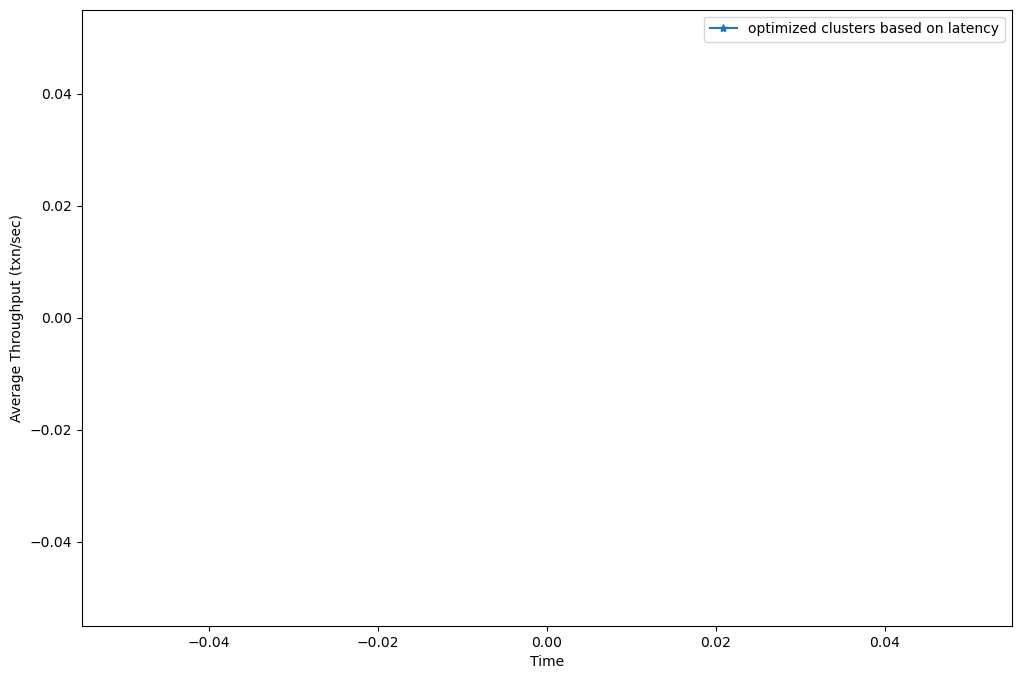

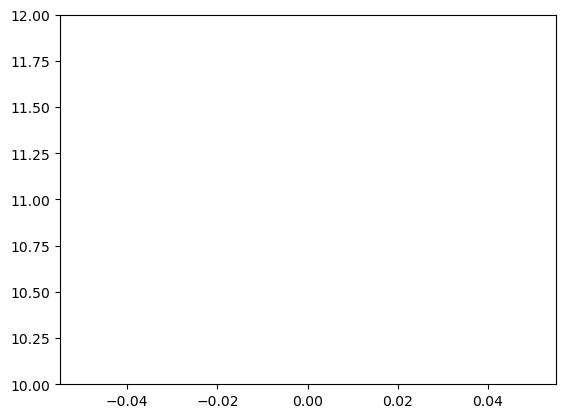

In [9]:
for cfig in config_list:   
    if 2>1:

        os.system('rm node_info.csv')
        os.system('cp node_setup/'+cfig+'.csv node_info.csv')


        df =pd.read_csv('node_info.csv')

        node_info_dict = df.to_dict()

        node_info_dict

        lines  = []



        for node_id in node_info_dict['node_id'].keys():
        #     print(node_id, node_info_dict['node_id'][node_id], node_info_dict['region'][node_id])

            lim = node_info_dict['node_id'][node_id]
            reg = node_info_dict['region'][node_id].strip().replace('\'', '')

        #     print(reg)

            cmd = 'gcloud compute instances create resdb-'+f"{lim:02}"+' --project=ucr-ursa-major-lesani-lab --zone='+reg+' --machine-type=e2-highmem-2 --network-interface=network-tier=PREMIUM,stack-type=IPV4_ONLY,subnet=default --can-ip-forward --maintenance-policy=MIGRATE --provisioning-model=STANDARD --service-account=961693926925-compute@developer.gserviceaccount.com --scopes=https://www.googleapis.com/auth/devstorage.read_only,https://www.googleapis.com/auth/logging.write,https://www.googleapis.com/auth/monitoring.write,https://www.googleapis.com/auth/servicecontrol,https://www.googleapis.com/auth/service.management.readonly,https://www.googleapis.com/auth/trace.append --tags=http-server,https-server --create-disk=auto-delete=yes,boot=yes,device-name=instance-3,image=projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831,mode=rw,size=10,type=projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/diskTypes/pd-balanced --no-shielded-secure-boot --shielded-vtpm --shielded-integrity-monitoring --labels=goog-ec-src=vm_add-gcloud --reservation-affinity=any'
        #     cmd = 'gcloud compute instances create resdb-'+f"{lim:02}"+' --project=ucr-ursa-major-lesani-lab --zone='+reg+' --machine-type=e2-small --network-interface=network-tier=PREMIUM,stack-type=IPV4_ONLY,subnet=default --can-ip-forward --maintenance-policy=MIGRATE --provisioning-model=STANDARD --service-account=961693926925-compute@developer.gserviceaccount.com --scopes=https://www.googleapis.com/auth/devstorage.read_only,https://www.googleapis.com/auth/logging.write,https://www.googleapis.com/auth/monitoring.write,https://www.googleapis.com/auth/servicecontrol,https://www.googleapis.com/auth/service.management.readonly,https://www.googleapis.com/auth/trace.append --tags=http-server,https-server --create-disk=auto-delete=yes,boot=yes,device-name=instance-3,image=projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831,mode=rw,size=10,type=projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/diskTypes/pd-balanced --no-shielded-secure-boot --shielded-vtpm --shielded-integrity-monitoring --labels=goog-ec-src=vm_add-gcloud --reservation-affinity=any'

            lines.append(cmd)


        lines


        def run_command(command):
            subprocess.call(command, shell=True)

        commands = lines

        # Create a ThreadPoolExecutor or ProcessPoolExecutor, depending on your needs
        with concurrent.futures.ThreadPoolExecutor(max_workers=len(commands)) as executor:
            # Submit each command to the executor for parallel execution
            futures = [executor.submit(run_command, command) for command in commands]

            # Wait for all tasks to complete
            concurrent.futures.wait(futures)


        instance_type = 'e2-small'


        redirect = '>'
        os.system('gcloud compute instances list  --format="value(networkInterfaces[0].networkIP)" '+\
                  redirect+' all_internal_ips')



        os.system('gcloud compute instances list --format="value(networkInterfaces[0].networkIP)" '+\
              redirect+' all_external_ips')





        !cat all_internal_ips
        ! echo " " 
        # !cat all_external_ips



        f = open('all_external_ips', "r")
        data1 = [line.strip() for line in f.readlines()]

        data1 = [x for x in data1 if x!='None']

        f = open('all_internal_ips', "r")
        data2 = [line.strip() for line in f.readlines()]

        data2 = [x for x in data2 if x!='None']

        data1, data2

        data2, len(data2)

        data = []

        # for i in range(len(data1)):
        #     if data1[i]!='None':
        # #         data.append(data1[i] + '    ' + data2[i])
        #         data.append('127.0.0.1'+ '    ' + '127.0.0.1')


        skip_instances = 0

        for i in range(skip_instances, len(data1)):
            if data1[i]!='None':
                data.append(data1[i] + '    ' + data2[i])
        #         data.append('127.0.0.1'+ '    ' + '127.0.0.1')

        data, len(data)

        for index, item in enumerate(data1):
            if 'publicIP' not in node_info_dict.keys():
                node_info_dict['publicIP'] = {}


            node_info_dict['publicIP'][index] = item 


        for index, item in enumerate(data2):
            if 'privateIP' not in node_info_dict.keys():
                node_info_dict['privateIP'] = {}

            node_info_dict['privateIP'][index] = item 



        for index, item in enumerate(data):
            if 'publicAndprivateIP' not in node_info_dict.keys():
                node_info_dict['publicAndprivateIP'] = {}

            node_info_dict['publicAndprivateIP'][index] = item 

        node_info_dict

        for item in node_info_dict['publicAndprivateIP']:
            print(node_info_dict['publicAndprivateIP'][item])

        with open('replicas.txt', 'w') as f:

            for item in node_info_dict['publicAndprivateIP']:

                if (node_info_dict['ServerOrClientregion'][item] ==0):
                    f.write("%s\n" % node_info_dict['publicAndprivateIP'][item])


        node_info_dict['ServerOrClientregion']

        ! cat replicas.txt

        with open('clients.txt', 'w') as f:

            for item in node_info_dict['publicIP']:

                if (node_info_dict['ServerOrClientregion'][item] ==1):
                    f.write("%s\n" % node_info_dict['publicIP'][item])

        os.system('cat clients.txt')

        node_info_dict

        # def run_server_node_remote(i):
        #     ip = lines[i]
        # #     if ip!='None' and( ip in nodeIps[:-3]):
        #     if ip!='None' and( ip in nodeIps):


        #         current = (ip.split('.'))
        #         command = './examples/hotstuff-app --conf hotstuff.gen-sec'+str(nodeIps.index(ip))+'.conf '

        #         print(i,command)



        # for i in range(len(lines)):
        #     print(i)
        #     run_server_node_remote(i)




        # def run_client_node_remote(i):
        #     ip = lines[i]
        #     if ip!='None' and( ip in clientIps):

        #         current = (ip.split('.'))
        #         command = './examples/hotstuff-client --idx 0 --iter -1 --max-async 5 >../nohup.out 2>&1 &"'

        #         print(command)

        # for i in range(len(lines)):
        #     print(i)
        #     run_client_node_remote(i)


        # # # os.system('echo 3108 | sudo -S ls')/FinalKeys.pem

        # # experiment = 'exp_f1'

        # # os.system('echo 3108 | sudo -S sh job_mini1.sh '+experiment)

        # # os.system('./run_cli.sh new '+experiment+'_cli;')
        # # os.system('sleep 30;')
        # # kill_nodes(3)

        # # # run_server_node(3)

        # # os.system('sleep 30;')

        # # os.system('./run_cli.sh stop '+experiment+'_cli;')
        # # os.system('./run.sh stop '+experiment+';')
        # # os.system('./run_cli.sh fetch '+experiment+'_cli;')
        # # os.system('cat '+experiment+'_cli/remote/*/log/stderr | python3 ../thr_hist.py --plot')



        # def run_server_node(i):
        #     ip = lines[i]
        # #     if ip!='None' and( ip in nodeIps[:-3]):
        #     if ip!='None':

        #         current = (ip.split('.'))
        #         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/MAKWest.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
        #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd /home/ubuntu/testbed/'+experiment+'/0/conf/; sudo nohup ../../../../libhotstuff/examples/hotstuff-app --conf '+'/home/ubuntu/testbed/'+experiment+'/0/conf/'+'hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'

        #         print(command)
        #         os.system(command)


        # def run_node(i):
        #     ip = lines[i]
        # #     if ip!='None' and( ip in nodeIps[:-3]):
        #     if ip!='None' and ip in lines[:nnodes]:

        #         current = (ip.split('.'))
        #         command = 'echo 1234 | sudo -S nohup ../../examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf > ../temp/nohup_'+str(i)+'.out 2>&1 &'

        #         print(command)
        #         os.system(command)


        # def run_client(i):
        #     ip = lines[i]
        #     client_no = i - nnodes
        #     if ip!='None' and( ip in lines[nnodes:]):

        #         current = (ip.split('.'))
        #         command = 'echo 1234 | sudo -S nohup ../../examples/hotstuff-client --idx '+str(client_no)+' --iter -1 --max-async 4 > ../temp/nohup_client_'+str(i)+'.out 2>&1 &'

        #         print(command)
        #         os.system(command)



        # def run_client2(i):
        #     ip = lines[i]
        #     client_no = i - nnodes
        #     if ip!='None' and( ip in lines[nnodes:]):

        #         current = (ip.split('.'))
        #         command = 'echo 1234 | sudo -S nohup ../../examples/hotstuff-client --idx '+str(client_no)+' --iter -1 --max-async 4 > ../temp/nohup_client_'+str(i)+'_2.out 2>&1 &'

        #         print(command)
        #         os.system(command)



        # # def run_join_node(i):
        # #     ip = lines[i]
        # #     if ip!='None':

        # #         current = (ip.split('.'))
        # #         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Downloads/MAKWest.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
        # #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf '+'/home/ubuntu/testbed/'
        # #         +experiment+'/0/conf/'+'hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'

        # #         print(command)
        # #         os.system(command)




        # # def kill_nodes(i):
        # #     ip = lines[i]

        # #     if ip!='None':
        # #         current = (ip.split('.'))
        # #         command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Downloads/MAKWest.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
        # #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com -T "cd hotstuffO; sudo killall hotstuff-app; sudo killall hotstuff-client;"'

        # #         output = subprocess.getoutput(command)
        # #         print(output)





        # # # run_server_node(3)

        # # # current



        # # os.system('cat exp_4c5n_cli/remote/*/log/stderr | python3 ../thr_hist.py --plot')


        def setup_remote(i):

            ip = node_info_dict['publicIP'][i] 
            if ip!='None':
                command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "sudo apt -y update;sudo apt -y install build-essential; sudo apt -y install autoconf libtool libssl-dev libuv1-dev cmake pkg-config cmake-data make; sudo rm -r hotstuffO; git clone https://github.com/tmane002/hotstuffO.git;"'

                print(command)

                output = os.system(command)
                print(output)


        def setup_remote2(i):

            ip = node_info_dict['publicIP'][i] 
            if ip!='None':
                current = (ip.split('.'))



                command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; git pull;"'

                print(command)

                output = os.system(command)
                print(output)


        def git_pull_remote(i):

            ip = node_info_dict['publicIP'][i] 
            if ip!='None':
                current = (ip.split('.'))
                command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
                              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo git pull;"'


                output = subprocess.getoutput(command)
                print(output)



        # def run_join_node_remote(i):
        #     ip = node_info_dict['publicIP'][i] 
        #     if ip!='None' and( ip == nodeIps[-1]):

        #         current = (ip.split('.'))
        #         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
        #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'

        #         print(command)
        #         os.system(command)



        # def run_join_node1_remote(i):
        #     ip = node_info_dict['publicIP'][i] 
        #     if ip!='None' and( ip == nodeIps[-1]):

        #         current = (ip.split('.'))
        #         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
        #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'

        #         print(command)
        #         os.system(command)

        # def run_join_node2_remote(i):
        #     ip = node_info_dict['publicIP'][i] 
        #     if ip!='None' and( ip == nodeIps[-2]):

        #         current = (ip.split('.'))
        #         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
        #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'

        #         print(command)
        #         os.system(command)

        # def run_join_node3_remote(i):
        #     ip = node_info_dict['publicIP'][i] 
        #     if ip!='None' and( ip == nodeIps[-3]):

        #         current = (ip.split('.'))
        #         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
        #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(i)+'.conf >../nohup.out 2>&1 &"'

        #         print(command)
        #         os.system(command)




        def kill_nodes_remote(i):
            ip = node_info_dict['publicIP'][i] 

            if ip!='None':
                current = (ip.split('.'))

                command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo killall hotstuff-app; sudo killall hotstuff-client;"'


                output = subprocess.getoutput(command)
                print(output)



        def clean_nodes_remote(i):
            ip = node_info_dict['publicIP'][i] 

            if ip!='None':
                current = (ip.split('.'))

                command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "sudo rm -f nohup.out;"'


                print(command)
                os.system(command)








        experiment = 'test'
        os.system('rm hotstuff.gen*')
        os.system('echo 3108 | sudo -S sh job_mini.sh '+ experiment)

        os.system('cp hotstuff.gen* ../../')

        import os
        os.system('cd ../../; git add .; git commit -m "Testing"; git push -f')


        # # def setup_remote3(i):

        # #     ip = node_info_dict['publicIP'][i] 
        # #     if ip!='None':
        # #         current = (ip.split('.'))
        # #         command = 'echo 3108 | sudo -S ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
        # #                       +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "sudo rm -r hotstuffO; git clone https://github.com/tmane002/hotstuffO.git;"'
        # #         print(command)

        # #         output = os.system(command)
        # #         print(output)


        # results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(setup_remote)(i)\
        #                                                                        for i in [9])#node_info_dict['node_id'])


        # print(results)  

        time.sleep(60)


        results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(setup_remote)(i)\
                                                                               for i in node_info_dict['node_id'])


        print(results)  



        # for i in node_info_dict['publicIP']:
        #     print(i)
        #     setup_remote2(i)

        # compile_remote(0)



        def compile_remote(i):

            ip = node_info_dict['publicIP'][i] 
            if ip!='None':
                current = (ip.split('.'))


                command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo nohup sh compile_job.sh >../make_job.out 2>&1 &"'


                print(command)
                output = os.system(command)
                print(output)






        results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(compile_remote)(i)\
                                                                               for i in list(node_info_dict['node_id'].keys()))


        print(results)  

        time.sleep(300)

        # def compile_remote(i):

        #     ip = node_info_dict['publicIP'][i] 
        #     if ip!='None':
        #         current = (ip.split('.'))
        #         command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
        #                       +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo nohup sh compile_job.sh >../make_job.out 2>&1 &"'


        # #         output = os.system(command)
        #         print(command)


        # for i in range(60):
        #     compile_remote(i)

        # time.sleep(420)




        results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(clean_nodes_remote)(i)\
                                                                               for i in node_info_dict['node_id'])


        print(results)  


        # node_info_dict

        def run_server_node_remote(i):
            ip = node_info_dict['publicIP'][i] 
        #     if ip!='None' and( ip in nodeIps[:-3]):

            if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:

                current = (ip.split('.'))


                command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(node_info_dict['ServerID'][i])+'.conf >../nohup.out 2>&1 &"'

                print(i,command)
                os.system(command)


        results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(run_server_node_remote)(i)\
                                                                               for i in node_info_dict['node_id'])

        print(results)  
        time.sleep(45)


        # for i in node_info_dict['publicIP']:
        #     kill_nodes_remote(i)

        # def run_client_node_remote_print(i):
        #     ip = node_info_dict['publicIP'][i] 

        #     if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:

        #         current = (ip.split('.'))
        #         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
        #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo nohup ./examples/hotstuff-client --idx '+str(node_info_dict['clientID'][i])+' --iter -1 --max-async 5 >../nohup.out 2>&1 &"'

        #         print(command)

        # for i in node_info_dict['publicIP']:
        #     run_client_node_remote_print(i)

        # def run_server_node_remote(i):
        #     ip = node_info_dict['publicIP'][i] 
        # #     if ip!='None' and( ip in nodeIps[:-3]):

        #     if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:

        #         current = (ip.split('.'))
        #         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
        #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com  -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(node_info_dict['ServerID'][i])+'.conf >../nohup.out 2>&1 &"'

        #         print(i,command)
        # #         os.system(command)

        # f



        def run_client_node_remote(i):
            ip = node_info_dict['publicIP'][i] 

            if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:

                current = (ip.split('.'))


                command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd hotstuffO; sudo nohup ./examples/hotstuff-client --idx '+str(node_info_dict['clientID'][i])+' --iter -1 --max-async 400 >../nohup.out 2>&1 &"'


                print(command)
                os.system(command)




        results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(run_client_node_remote)(i)\
                                                                               for i in node_info_dict['node_id'])

        print(results)  


        # for i in node_info_dict['publicIP']:
        #     run_client_node_remote(i)

        time.sleep(150)

        results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(kill_nodes_remote)(i)\
                                                                               for i in node_info_dict['publicIP'])


        os.system('cd ../../../dump_files; echo 3108 | sudo -S  rm *')

        for i in node_info_dict['publicIP']:
            ip = node_info_dict['publicIP'][i] 

            if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
                current = (ip.split('.'))
                command = 'gcloud compute scp --zone "'+str(node_info_dict['region'][i].strip()[1:-1]) +'"'+' resdb-'+f"{i:02}"+':/home/tejas/nohup.out ../../../dump_files/nohup_client_'+str(node_info_dict['clientID'][i])+'.out'
                print(command)
                os.system(command)



        for i in node_info_dict['publicIP']:
            ip = node_info_dict['publicIP'][i] 

            if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
                current = (ip.split('.'))
                command = 'gcloud compute scp --zone "'+str(node_info_dict['region'][i].strip()[1:-1]) +'"'+' resdb-'+f"{i:02}"+':/home/tejas/nohup.out ../../../dump_files/nohup_server_'+str(node_info_dict['ServerID'][i])+'.out'
                print(command)
                os.system(command)
                break

        # result = subprocess.check_output('cat ../'+experiment+'/nohup_client_*', shell=True)


        # result = result.decode("utf-8") 

        # lines = result.split('\n')

        # #     commit_pat = re.compile('([^[].*) \[hotstuff info\] ([0-9.]*)$')
        # commit_pat = re.compile('([^[].*) \[hotstuff info\] got*')

        # Times = []
        # lats = []

        # for line in lines:
        #     m = commit_pat.match(line)
        #     if m:
        # #             try:

        #             time_item = float((line.split(' ')[1]).split(':')[0])*3600 + float((line.split(' ')[1]).split(':')[1])*60 + \
        #             float((line.split(' ')[1]).split(':')[2])
        #             Times.append(time_item)        

        #             lats.append(float(m.group(2)))
        #             print(lats[-1])
        # #             except:

        # lines


        # def getThroughput(experiment):

        #     result = subprocess.check_output('cat ../'+experiment+'/nohup_client_*', shell=True)


        #     result = result.decode("utf-8") 

        #     lines = result.split('\n')

        #     commit_pat = re.compile('([^[].*) \[hotstuff info\] ([0-9.]*)$')
        # #     commit_pat = re.compile('([^[].*) \[hotstuff info\] got*')

        #     Times = []
        #     lats = []

        #     for line in lines:
        #         m = commit_pat.match(line)
        #         if m:
        #             try:

        #                 time_item = float((line.split(' ')[1]).split(':')[0])*3600 + float((line.split(' ')[1]).split(':')[1])*60 + \
        #                 float((line.split(' ')[1]).split(':')[2])
        #                 Times.append(time_item)        

        #                 lats.append(float(m.group(2)))
        # #                 print(lats[-1])
        #             except:
        #                 continue


        #     begin_time = None
        #     values = []
        #     interval = 1
        #     cnt = 0
        #     Times.sort()
        #     for timestamp in Times:
        #         if begin_time is None:
        #             begin_time = timestamp
        #             next_begin_time = timestamp +interval

        #         while timestamp >= next_begin_time:
        #             begin_time = next_begin_time
        #             next_begin_time += interval
        #             values.append(cnt)
        #             cnt = 0
        #         cnt += 1
        #     values.append(cnt)

        # #     lats, _ = remove_outliers(lats)
        # #     print(len(values))


        #     return np.arange(len(values))*interval,np.array(values)/interval, lats

        experiment = '../../dump_files'
        X,Y, lats = getThroughput(experiment)


        print(np.sum(Y)/len(Y), np.average(lats))

        lats

        lats

        np.sum(Y)

        s1, s2 = X[:-2],Y[:-2]

        np.average(s2[10:40]),np.average(lats[-33:-3])

        lats





        fig = pl.figure(figsize = (12, 8))
        fig.patch.set_facecolor('white')
        pl.plot(s1,s2, '-*', label = 'optimized clusters based on latency')


        pl.legend()
        pl.xlabel('Time')
        pl.ylabel('Average Throughput (txn/sec)')
        # pl.title('HotStuff Multicluster: Throughput in Optimized Vs Non-Optimized Clusters')

        # pl.ylim(0,50)
        # pl.savefig('/home/tejas/Desktop/OptClusters.png', dpi =150, bbox_inches = 0 )
        pl.show()
        pl.clf()

        # pl.figure(figsize = (12,8))
        # pl.rcParams.update({'font.size': 17})
        # fig.patch.set_facecolor('white')
        # pl.plot(s1,s2, '-*', label = 'Hotstuff-MC: Leader Failure')


        # pl.legend()
        # pl.xlabel('Time')
        # pl.ylabel('Throughput (txn/sec)')
        # # pl.title('HotStuff Multicluster: Throughput in Optimized Vs Non-Optimized Clusters')

        # # pl.ylim(0,50)
        # pl.savefig('/home/tejas/Desktop/LeaderFailure_HotStuffMC.png', dpi =150, bbox_inches = 0 )
        # pl.show()
        # pl.clf()

        pl.plot(lats)
        pl.ylim(0.8,1.2)

        pl.plot(lats)
        pl.ylim(10,12)



        experiment = cfig

        if not os.path.exists('../../../Experiments/ho_'+experiment):
            os.mkdir('../../../Experiments/ho_'+experiment)


#         os.system('gcloud compute instances delete --zone=europe-west3-c --quiet $(gcloud compute instances list --format="value(name)")')
#         os.system('gcloud compute instances delete --zone=asia-south1-c --quiet $(gcloud compute instances list --format="value(name)")')
#         os.system('gcloud compute instances delete --zone=us-west1-b --quiet $(gcloud compute instances list --format="value(name)")')   

#     except:
        
#         os.system('gcloud compute instances delete --zone=europe-west3-c --quiet $(gcloud compute instances list --format="value(name)")')
#         os.system('gcloud compute instances delete --zone=asia-south1-c --quiet $(gcloud compute instances list --format="value(name)")')
#         os.system('gcloud compute instances delete --zone=us-west1-b --quiet $(gcloud compute instances list --format="value(name)")')
#         continue


# lats

# os.system('grep -n -r "LatencyPlot: new node sending join request message" ../../../dump_files/')

# os.system('grep -n -r "LatencyPlot: Received first message with new node info" ../../../dump_files/')

# os.system('grep -n -r "LatencyPlot: Leader received with tentative sets from all peer nodes" ../../../dump_files/')        

# 1000*(32.776365 - 32.768622)

# os.system('grep -n -r "LatencyPlot: Received second join message" ../../../dump_files/')        

# os.system('grep -n -r "LatencyPlot: Received initial join message" ../../../dump_files/')        

# os.system('grep -n -r "Sending Join Init message with height" ../../../dump_files/')        

# 1000*(17.534818-17.534437)

# os.system('grep -n -r "LatencyPlot: Sent response to  initial join message" ../../../dump_files/')        


    
# os.system('grep -n -r "LatencyPlot: Received second join message" ../../../dump_files/')        

# 17.536482

In [ ]:
# os.system('grep -n -r "quorum reached for second join message with cluster_id" ../../../dump_files/')

In [ ]:
# os.system('grep -n -r "LatencyPlot: Received 1st MC message" ../../../dump_files/')

In [ ]:
# os.system('grep -n -r "LatencyPlot: before sending first mc message" ../../../dump_files/')

In [ ]:
# 1000*(32.676090-32.612236)

In [ ]:
# os.system('grep -n -r "LatencyPlot: going to execute based on 2nd MC message" ../../../dump_files/')


# os.system('grep -n -r "LatencyPlot: Finished execution" ../../../dump_files/')

# os.system('grep -n -r "LatencyPlot: Processing message from client" ../../../dump_files/')    

In [ ]:
# os.system('grep -n -r "LatencyPlot: before initial join message" ../../../dump_files/')    

In [ ]:
# # os.system('grep -n -r "LatencyPlot: " ../../../dump_files/')

# 1000*(11.479877-11.479442), 1000*(11.484887-11.479877),1000*(56.048590-56.046569), 1000*(56.050021 - 56.048590)

# # exec, # first mc, #second mc

# 1000*(56.050377 - 56.050181), 1000*(56.049389-56.049025), 1000*(56.050875-56.049389), 1000*(56.046557-56.038591) 


# # with open('opt1.npy', 'wb') as f:
# #     np.save(f, s1)
# #     np.save(f, s2)
    

    
# # with open('opt1.npy', 'rb') as f:
# #     opt1 = np.load(f)
# #     opt2 = np.load(f)
  
    








# # with open('equiCluster1.npy', 'wb') as f:
# #     np.save(f, s1)
# #     np.save(f, s2)
    

    
# # with open('equiCluster1.npy', 'rb') as f:
# #     eq1 = np.load(f)
# #     eq2 = np.load(f)
  
    
    
    
# # with open('equiCluster.npy', 'rb') as f:
# #     eq1 = np.load(f)
# #     eq2 = np.load(f)

    
# # with open('lat.npy', 'rb') as f:
# #     lat1 = np.load(f)
# #     lat2 = np.load(f)

    
    
# # with open('opt.npy', 'rb') as f:
# #     opt1 = np.load(f)
# #     opt2 = np.load(f)


# fig = pl.figure(figsize = (12, 8))
# fig.patch.set_facecolor('white')
# pl.plot(s1,s2, '-*', label = 'optimized clusters based on latency')

# # pl.plot(eq1,eq2, '-*', label = 'optimized clusters: equal clusters (7 (R1),7 (R2)')
# # pl.plot(lat1,lat2, '-*', label = 'optimized clusters: latency (9 (R1),5 (R2))')
# # pl.plot(opt1,opt2, '-*', label = 'optimized clusters: latency and heterogeneity (4 (R1),5 (R1), 5 (R2))')
# pl.legend()
# pl.xlabel('Time')
# pl.ylabel('Average Throughput (txn/sec)')
# # pl.title('HotStuff Multicluster: Throughput in Optimized Vs Non-Optimized Clusters')

# # pl.ylim(0,350)
# # pl.savefig('/home/tejas/Desktop/OptClusters.png', dpi =150, bbox_inches = 0 )
# pl.show()
# pl.clf()

## Single Non-Leader Failure

experiment = 'test'
os.system('rm hotstuff.gen*')
os.system('sh job_mini.sh '+ experiment)

os.system('cp hotstuff.gen* ../../')

os.system('cd ../../; git add .; git commit -m "testing rvc on server"; git push -f')

    
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(setup_remote2)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  

results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(compile_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  

results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(clean_nodes_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results) 

def run_server_node_remote(i):
    ip = node_info_dict['publicIP'][i] 
#     if ip!='None' and( ip in nodeIps[:-3]):

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com  -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(node_info_dict['ServerID'][i])+'.conf >../nohup.out 2>&1 &"'
        
        print(i,command)
        os.system(command)
        
        
    
for i in node_info_dict['publicIP']:
    run_server_node_remote(i)
    
    
time.sleep(20)



def run_client_node_remote(i):
    ip = node_info_dict['publicIP'][i] 

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo nohup ./examples/hotstuff-client --idx '+str(node_info_dict['clientID'][i])+' --iter -1 --max-async 40 >../nohup.out 2>&1 &"'
        
        print(command)
        os.system(command)




    
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(run_client_node_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  

    
# for i in node_info_dict['publicIP']:
#     run_client_node_remote(i)

time.sleep(40)

for i in node_info_dict['publicIP']:
    if i==3:
        print(i)
        kill_nodes_remote(i)

time.sleep(45)

for i in node_info_dict['publicIP']:
    kill_nodes_remote(i)


for i in node_info_dict['publicIP']:
    ip = node_info_dict['publicIP'][i] 

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        current = (ip.split('.'))
        command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com:/home/ubuntu/nohup.out ../../../dump_files/nohup_client_'+str(node_info_dict['clientID'][i])+'.out'
        print(command)
        os.system(command)

experiment = '../../dump_files'
X,Y, lats = getThroughput(experiment)
print(np.sum(Y)/len(Y), np.average(lats))

fig = pl.figure(figsize = (12, 8))
fig.patch.set_facecolor('white')
pl.plot(X[:-2],Y[:-2], '-*')
pl.axvline(x=40, ls='--', color = 'red')
pl.xlabel('Time')
pl.ylabel('Average Throughput (txn/sec)')
pl.title('HotStuff Multicluster: Single Non-Leader Failure')

# pl.ylim(0,1000)
pl.savefig('/home/tejas/Desktop/NodeFailure.png', dpi =150, bbox_inches = 0 )
pl.show()
pl.clf()

## Single Leave

## Multiple Non Leader Failure

experiment = 'test'
os.system('rm hotstuff.gen*')
os.system('sh job_mini.sh '+ experiment)

os.system('cp hotstuff.gen* ../../')

os.system('cd ../../; git add .; git commit -m "testing rvc on server"; git push -f')

    
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(setup_remote2)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  

results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(compile_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  

results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(clean_nodes_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results) 

def run_server_node_remote(i):
    ip = node_info_dict['publicIP'][i] 
#     if ip!='None' and( ip in nodeIps[:-3]):

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com  -T "cd hotstuffO; sudo nohup ./examples/hotstuff-app --conf hotstuff.gen-sec'+str(node_info_dict['ServerID'][i])+'.conf >../nohup.out 2>&1 &"'
        
        print(i,command)
        os.system(command)
        
        
    
for i in node_info_dict['publicIP']:
    run_server_node_remote(i)
    
    
time.sleep(20)



def run_client_node_remote(i):
    ip = node_info_dict['publicIP'][i] 

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        
        current = (ip.split('.'))
        command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd hotstuffO; sudo nohup ./examples/hotstuff-client --idx '+str(node_info_dict['clientID'][i])+' --iter -1 --max-async 40 >../nohup.out 2>&1 &"'
        
        print(command)
        os.system(command)




    
results = Parallel(n_jobs=len(list(node_info_dict['node_id'].keys())))(delayed(run_client_node_remote)(i)\
                                                                       for i in node_info_dict['node_id'])


print(results)  

    
# for i in node_info_dict['publicIP']:
#     run_client_node_remote(i)

time.sleep(40)

for i in node_info_dict['publicIP']:
    if i==3:
        print(i)
        kill_nodes_remote(i)
        
time.sleep(20)

for i in node_info_dict['publicIP']:
    if i==7:
        print(i)
        kill_nodes_remote(i)
        
time.sleep(20)

for i in node_info_dict['publicIP']:
    if i==11:
        print(i)
        kill_nodes_remote(i)

time.sleep(45)

for i in node_info_dict['publicIP']:
    kill_nodes_remote(i)


for i in node_info_dict['publicIP']:
    ip = node_info_dict['publicIP'][i] 

    if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
        current = (ip.split('.'))
        command = 'scp -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
              +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com:/home/ubuntu/nohup.out ../../../dump_files/nohup_client_'+str(node_info_dict['clientID'][i])+'.out'
        print(command)
        os.system(command)

experiment = '../../dump_files'
X,Y, lats = getThroughput(experiment)
print(np.sum(Y)/len(Y), np.average(lats))

fig = pl.figure(figsize = (12, 8))
fig.patch.set_facecolor('white')
pl.plot(X[:-2],Y[:-2], '-*')
pl.axvline(x=40, ls='--', color = 'red')
pl.axvline(x=60, ls='--', color = 'green')
pl.axvline(x=80, ls='--', color = 'blue')

pl.xlabel('Time')
pl.ylabel('Average Throughput (txn/sec)')
pl.title('HotStuff Multicluster: Multiple Non-Leader Failure')

# pl.ylim(0,1000)
pl.savefig('/home/tejas/Desktop/MultiNodeFailure.png', dpi =150, bbox_inches = 0 )
pl.show()
pl.clf()

## Single Leave